# Assignment 2: Data collection, wrangling, exploration

# **Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
import warnings
from tqdm import tqdm
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv('healthcare-dataset-stroke-data.csv')
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.00,0,1,Yes,Private,Urban,228.69,36.60,formerly smoked,1
1,51676,Female,61.00,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.00,0,1,Yes,Private,Rural,105.92,32.50,never smoked,1
3,60182,Female,49.00,0,0,Yes,Private,Urban,171.23,34.40,smokes,1
4,1665,Female,79.00,1,0,Yes,Self-employed,Rural,174.12,24.00,never smoked,1


# **Data Info**

In [3]:
data.shape

(5110, 12)

In [4]:
data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

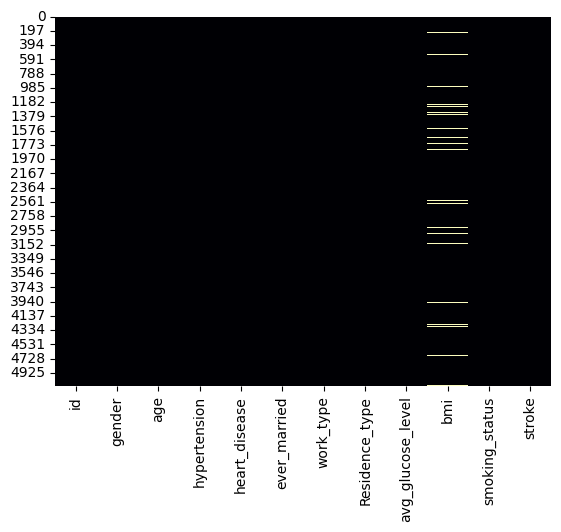

In [7]:
sns.heatmap(data.isnull(),cmap = 'magma',cbar = False);

Here, we can see that BMI has some missing values. We will need to take care of this.

In [8]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.00,5110.00,5110.00,5110.00,5110.00,4909.00,5110.00
mean,36517.83,43.23,0.10,0.05,106.15,28.89,0.05
std,21161.72,22.61,0.30,0.23,45.28,7.85,0.22
min,67.00,0.08,0.00,0.00,55.12,10.30,0.00
25%,17741.25,25.00,0.00,0.00,77.25,23.50,0.00
50%,36932.00,45.00,0.00,0.00,91.88,28.10,0.00
75%,54682.00,61.00,0.00,0.00,114.09,33.10,0.00
max,72940.00,82.00,1.00,1.00,271.74,97.60,1.00


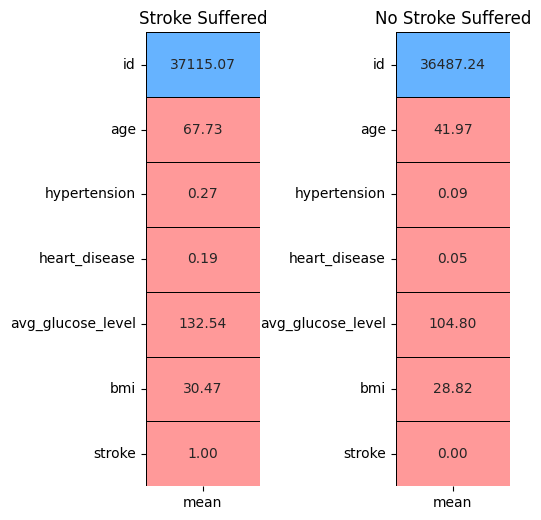

In [9]:
stroke = data[data['stroke'] == 1].describe().T
no_stroke = data[data['stroke'] == 0].describe().T

colors = ['#ff9999','#66b3ff']

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,5))
plt.subplot(1,2,1)
sns.heatmap(stroke[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('Stroke Suffered');

plt.subplot(1,2,2)
sns.heatmap(no_stroke[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('No Stroke Suffered');

fig.tight_layout(pad = 0)

The above two graphs show the mean values for the numerical columns for the case where stroke is yes and stroke is no.
- **age** and **avg_glucose_level** can be solid 1st hand indicators to identify a stroke, since there is a visible different in the means when there is a stroke and when there isn't a stroke.
- Mean **age** values of patients that suffered a stroke, **67.73**,is much higher than those did not suffer a stroke, **41.97**.
- Similarly, **avg_glucose_level** value of **132.54** can indicate a higher chance of suffering from stroke than the **avg_glucose_level** value of **104.80** that has been found in patients that did not suffer a stroke.

# **Fill Missing Values:**

Since BMI had some missing values, we will need to fill those values.

In [10]:
l1 = [i for i in tqdm(range(len(data.isnull()['bmi']))) if data.isnull().loc[i,'bmi'] == True]
print('Total Number of Missing Values in bmi feature :', len(l1))

100%|██████████| 5110/5110 [00:03<00:00, 1341.55it/s]

Total Number of Missing Values in bmi feature : 201


In [11]:
data['bmi'].mean()

np.float64(28.893236911794666)

In [12]:
data['bmi'].median()

np.float64(28.1)

We observe that mean and median values of **bmi** are very close to each other.
Hence, we will fill the missing values with the **mean values**.

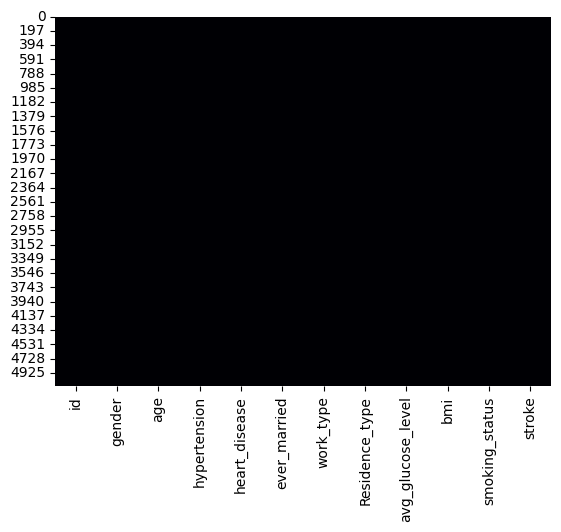

In [13]:
data['bmi'].fillna(data['bmi'].mean(),inplace = True)
sns.heatmap(data.isnull(),cmap = 'magma',cbar = False);

# **Duplicates**

In [14]:
duplicates = data.duplicated().sum()

In [15]:
duplicates

np.int64(0)

So, there are no duplicates in the data that we need to take care of.

# **Exploratory Data Analysis**

### Dividing features into Discrete and Categorical :

In [16]:
data.drop(columns = ['id'],inplace = True)
col = list(data.columns)
categorical_features = []
discrete_features = []
for i in col:
    if len(data[i].unique()) > 6:
        discrete_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('Discrete Features :',*discrete_features)

data['age'] = data['age'].astype(int)
df1 = data.copy(deep = True)

Categorical Features : gender hypertension heart_disease ever_married work_type Residence_type smoking_status stroke
Discrete Features : age avg_glucose_level bmi


In [17]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,0,1,Yes,Private,Urban,228.69,36.60,formerly smoked,1
1,Female,61,0,0,Yes,Self-employed,Rural,202.21,28.89,never smoked,1
2,Male,80,0,1,Yes,Private,Rural,105.92,32.50,never smoked,1
3,Female,49,0,0,Yes,Private,Urban,171.23,34.40,smokes,1
4,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.00,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80,1,0,Yes,Private,Urban,83.75,28.89,never smoked,0
5106,Female,81,0,0,Yes,Self-employed,Urban,125.20,40.00,never smoked,0
5107,Female,35,0,0,Yes,Self-employed,Rural,82.99,30.60,never smoked,0
5108,Male,51,0,0,Yes,Private,Rural,166.29,25.60,formerly smoked,0


In [18]:
df1

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,0,1,Yes,Private,Urban,228.69,36.60,formerly smoked,1
1,Female,61,0,0,Yes,Self-employed,Rural,202.21,28.89,never smoked,1
2,Male,80,0,1,Yes,Private,Rural,105.92,32.50,never smoked,1
3,Female,49,0,0,Yes,Private,Urban,171.23,34.40,smokes,1
4,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.00,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80,1,0,Yes,Private,Urban,83.75,28.89,never smoked,0
5106,Female,81,0,0,Yes,Self-employed,Urban,125.20,40.00,never smoked,0
5107,Female,35,0,0,Yes,Self-employed,Rural,82.99,30.60,never smoked,0
5108,Male,51,0,0,Yes,Private,Rural,166.29,25.60,formerly smoked,0


- We drop the **id** column as it is just a unique identifier, and meaningless to stroke contribution.
- Here, categorical features are if the the attribute has less than 6 unique elements else it is a discrete feature.
- Typical approach for this division of features can also be based on the datatypes of the elements of the respective attribute.

**Eg :** datatype = integer, attribute = discrete feature ; datatype = string, attribute = categorical feature

- Creating a deep copy of the orginal dataset for experimenting with data, visualization and modeling.
- Modifications in the original dataset will not be highlighted in this deep copy.
- We now Label Encode the data categorical text data features.
- Label encoding is necessary because the model cannot be trained unless data is in form of numbers. Categories need to be converted into numbered options.

In [19]:
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm

text_data_features = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
label_encoders = {}
l3, l4 = [], []

print('Label Encoder Transformation')
for col in tqdm(text_data_features):
    le = LabelEncoder()
    df1[col] = le.fit_transform(df1[col])
    label_encoders[col] = le
    l3.append(list(df1[col].unique()))
    l4.append(list(le.inverse_transform(df1[col].unique())))
    print(f"{col} : {df1[col].unique()} = {le.inverse_transform(df1[col].unique())}")


Label Encoder Transformation


100%|██████████| 5/5 [00:00<00:00, 476.34it/s]

gender : [1 0 2] = ['Male' 'Female' 'Other']
ever_married : [1 0] = ['Yes' 'No']
work_type : [2 3 0 4 1] = ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type : [1 0] = ['Urban' 'Rural']
smoking_status : [1 2 3 0] = ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


- We store the label encoded transformations inside a dictionary that gives us the information about the encoded value and it's original value. This will be useful later when we train the model and want to use it for inference, so we can translate back.
- The remaining two features heart disease and hypertension can be added to the dictionary manually as they did not need encoding.

In [20]:
tf1 = {}

for i, col in enumerate(text_data_features):
    tf1[col] = {
        j: k for j, k in zip(l3[i], l4[i])
    }

tf1['hypertension'] = {0: 'No Hypertension', 1: 'Hypertension'}
tf1['heart_disease'] = {0: 'No Heart Disease', 1: 'Heart Disease'}

tf1  # optional print for inspection


{'gender': {np.int64(1): 'Male', np.int64(0): 'Female', np.int64(2): 'Other'},
 'ever_married': {np.int64(1): 'Yes', np.int64(0): 'No'},
 'work_type': {np.int64(2): 'Private',
  np.int64(3): 'Self-employed',
  np.int64(0): 'Govt_job',
  np.int64(4): 'children',
  np.int64(1): 'Never_worked'},
 'Residence_type': {np.int64(1): 'Urban', np.int64(0): 'Rural'},
 'smoking_status': {np.int64(1): 'formerly smoked',
  np.int64(2): 'never smoked',
  np.int64(3): 'smokes',
  np.int64(0): 'Unknown'},
 'hypertension': {0: 'No Hypertension', 1: 'Hypertension'},
 'heart_disease': {0: 'No Heart Disease', 1: 'Heart Disease'}}

### Target Variable Visualization (stroke) :

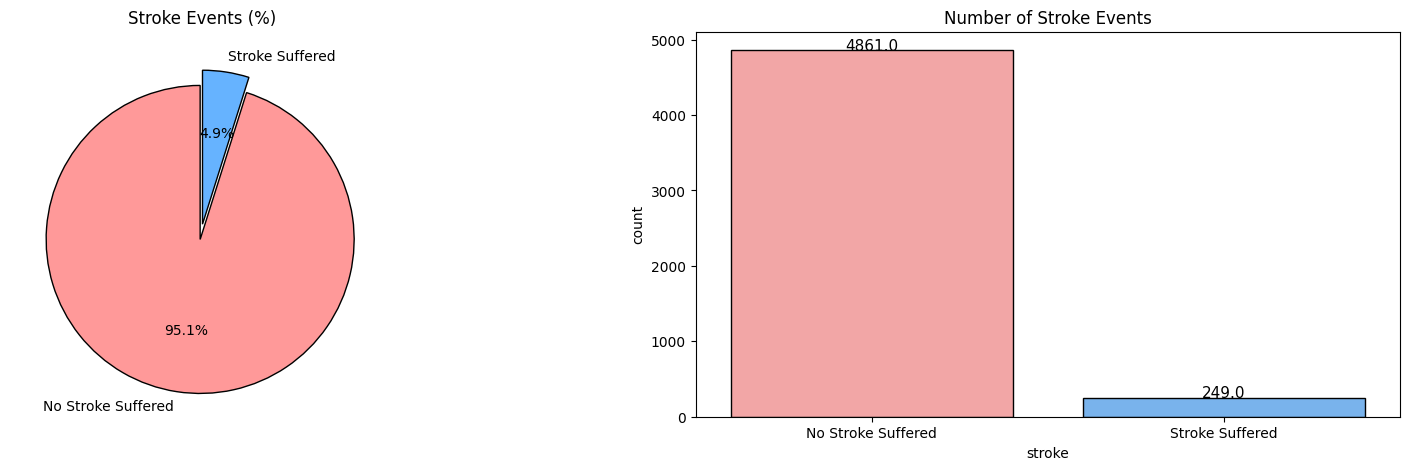

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define colors
colors = ['#ff9999','#66b3ff']

# Define the data for the pie chart
circle = df1['stroke'].value_counts().values  # Extracting count of each category

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

# Pie Chart
plt.subplot(1, 2, 1)
plt.pie(circle, labels=['No Stroke Suffered', 'Stroke Suffered'], autopct='%1.1f%%', startangle=90,
        explode=(0.1, 0), colors=colors, wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
plt.title('Stroke Events (%)')

# Countplot
plt.subplot(1, 2, 2)
ax = sns.countplot(x='stroke', data=df1, palette=colors, edgecolor='black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(),
            horizontalalignment='center', fontsize=11)
ax.set_xticklabels(['No Stroke Suffered', 'Stroke Suffered'])
plt.title('Number of Stroke Events')

plt.show()


- Clearly, the dataset is unbalanced in the favour of **no stroke**.
- **19 : 1** ratio is observed for **No Stroke : Stroke**
- Thus, due to such heavy bias towards cases of **No Stroke**, if we train a model, it will be highly biased and the prediction will not be accurate.
- We will have to balance the dataset somehow.

### Discrete Features :

#### Distribution of Discrete Features :

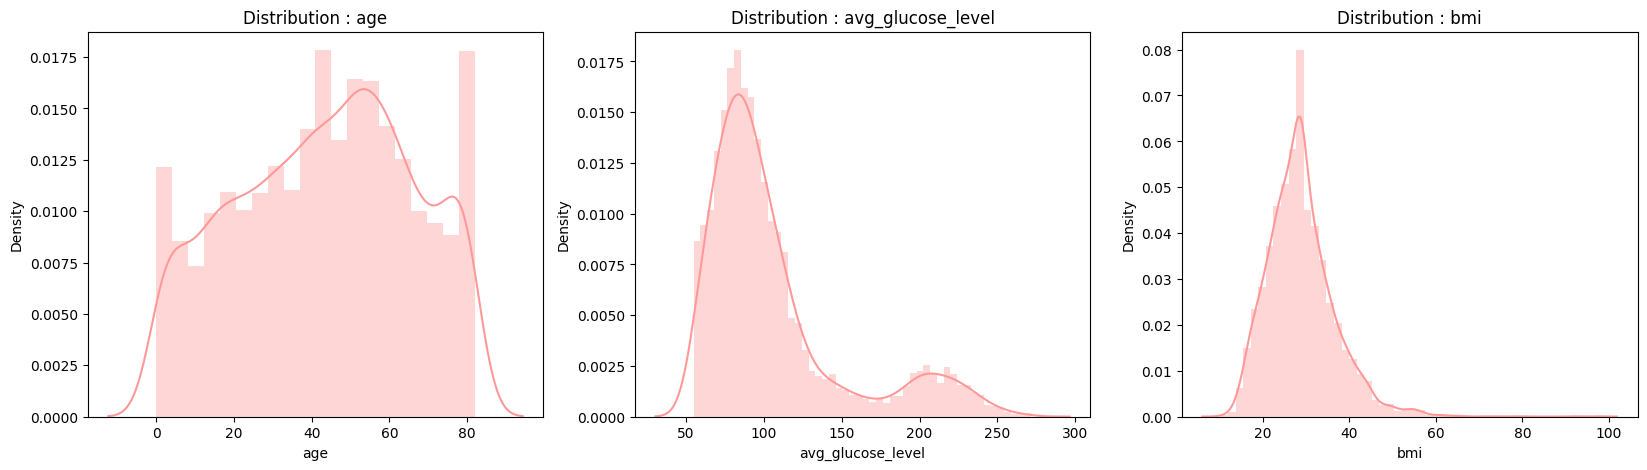

In [23]:
fig, ax = plt.subplots(nrows = 1,ncols = 3,figsize = (20,5))
for i in range(len(discrete_features)):
    plt.subplot(1,3,i+1)
    sns.distplot(df1[discrete_features[i]],color = colors[0])
    title = 'Distribution : ' + discrete_features[i]
    plt.title(title)
plt.show()

- Data distribution for **age** has dominant values around : **10**, **60** & **80**.
- **avg_glucose_level** has 2 peaks of uneven heights present at values around : **100** & **200**.
- **bmi** has a near about **normal distribution** but it has values in low numbers towards the right side

### Discrete Features w.r.t Target Variable (stroke) :

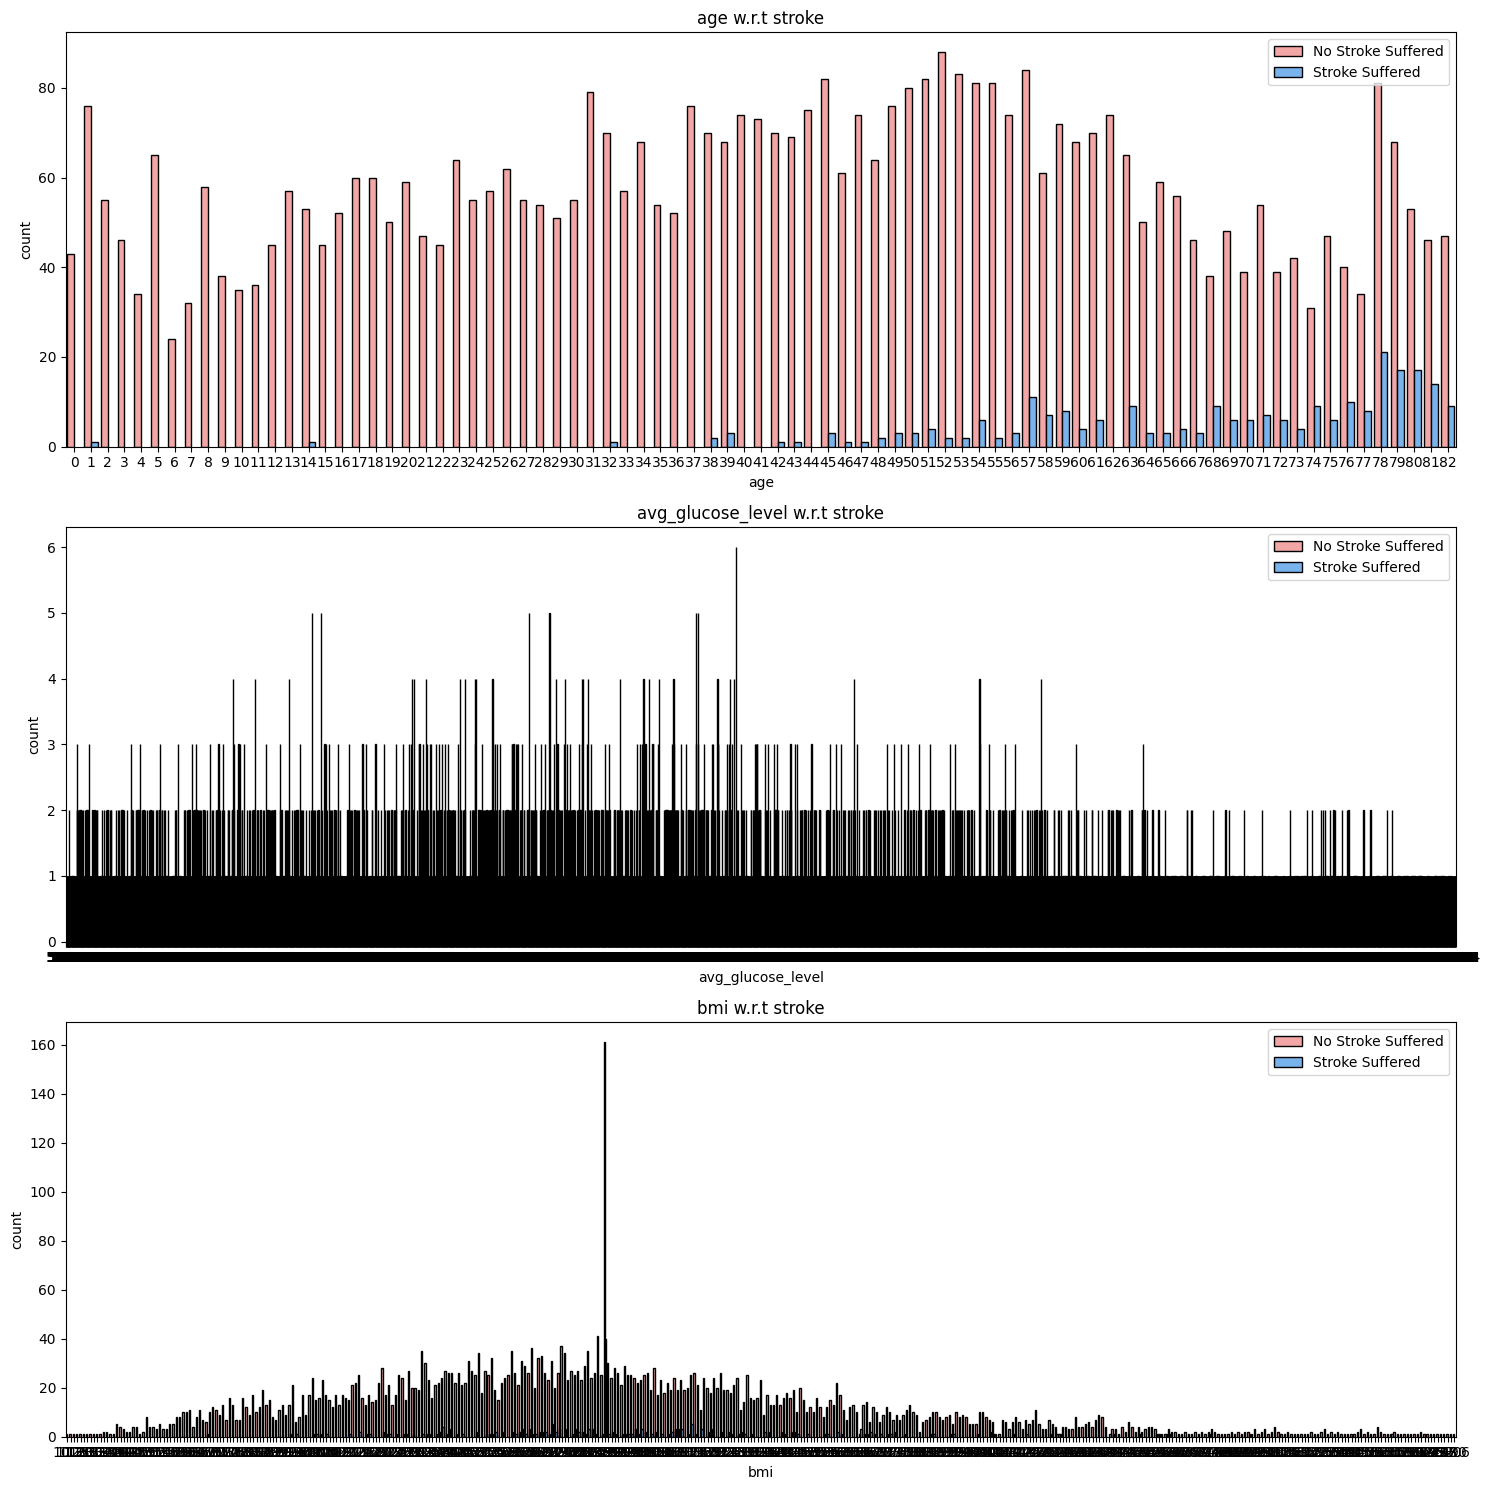

In [24]:
fig, ax = plt.subplots(nrows = 3, ncols = 1, figsize = (15, 15))
for i in range(len(discrete_features)):
    plt.subplot(3, 1, i + 1)
    sns.countplot(x=discrete_features[i], data=df1, hue="stroke", palette=colors, edgecolor='black')  # Corrected line
    plt.legend(['No Stroke Suffered', 'Stroke Suffered'], loc='upper right')
    title = discrete_features[i] + ' w.r.t stroke'
    plt.title(title)

plt.tight_layout()  # To prevent overlapping of subplots
plt.show()

- Because of too many unique data points in the **discrete_features**, it is difficult to gain any type of insight. Thus, we will convert these features into categorical features for visualizations.
- We scale the data points of these features to a constant value that represents a range of values.(like mean)
- Here, we divide the data points by a constant value and assign it's quotient value as the representative constant. The scaling constants are decided by looking into the data & intuition.
- Also, it is notable that high age values show stroke positives.

In [25]:
df1['age_group'] = [ int(i / 5) for i in df1['age']]
df1['avg_glucose_level_group'] = [ int(i / 20) for i in df1['avg_glucose_level']]
df1['bmi_group'] = [ int(i / 5) for i in df1['bmi']]

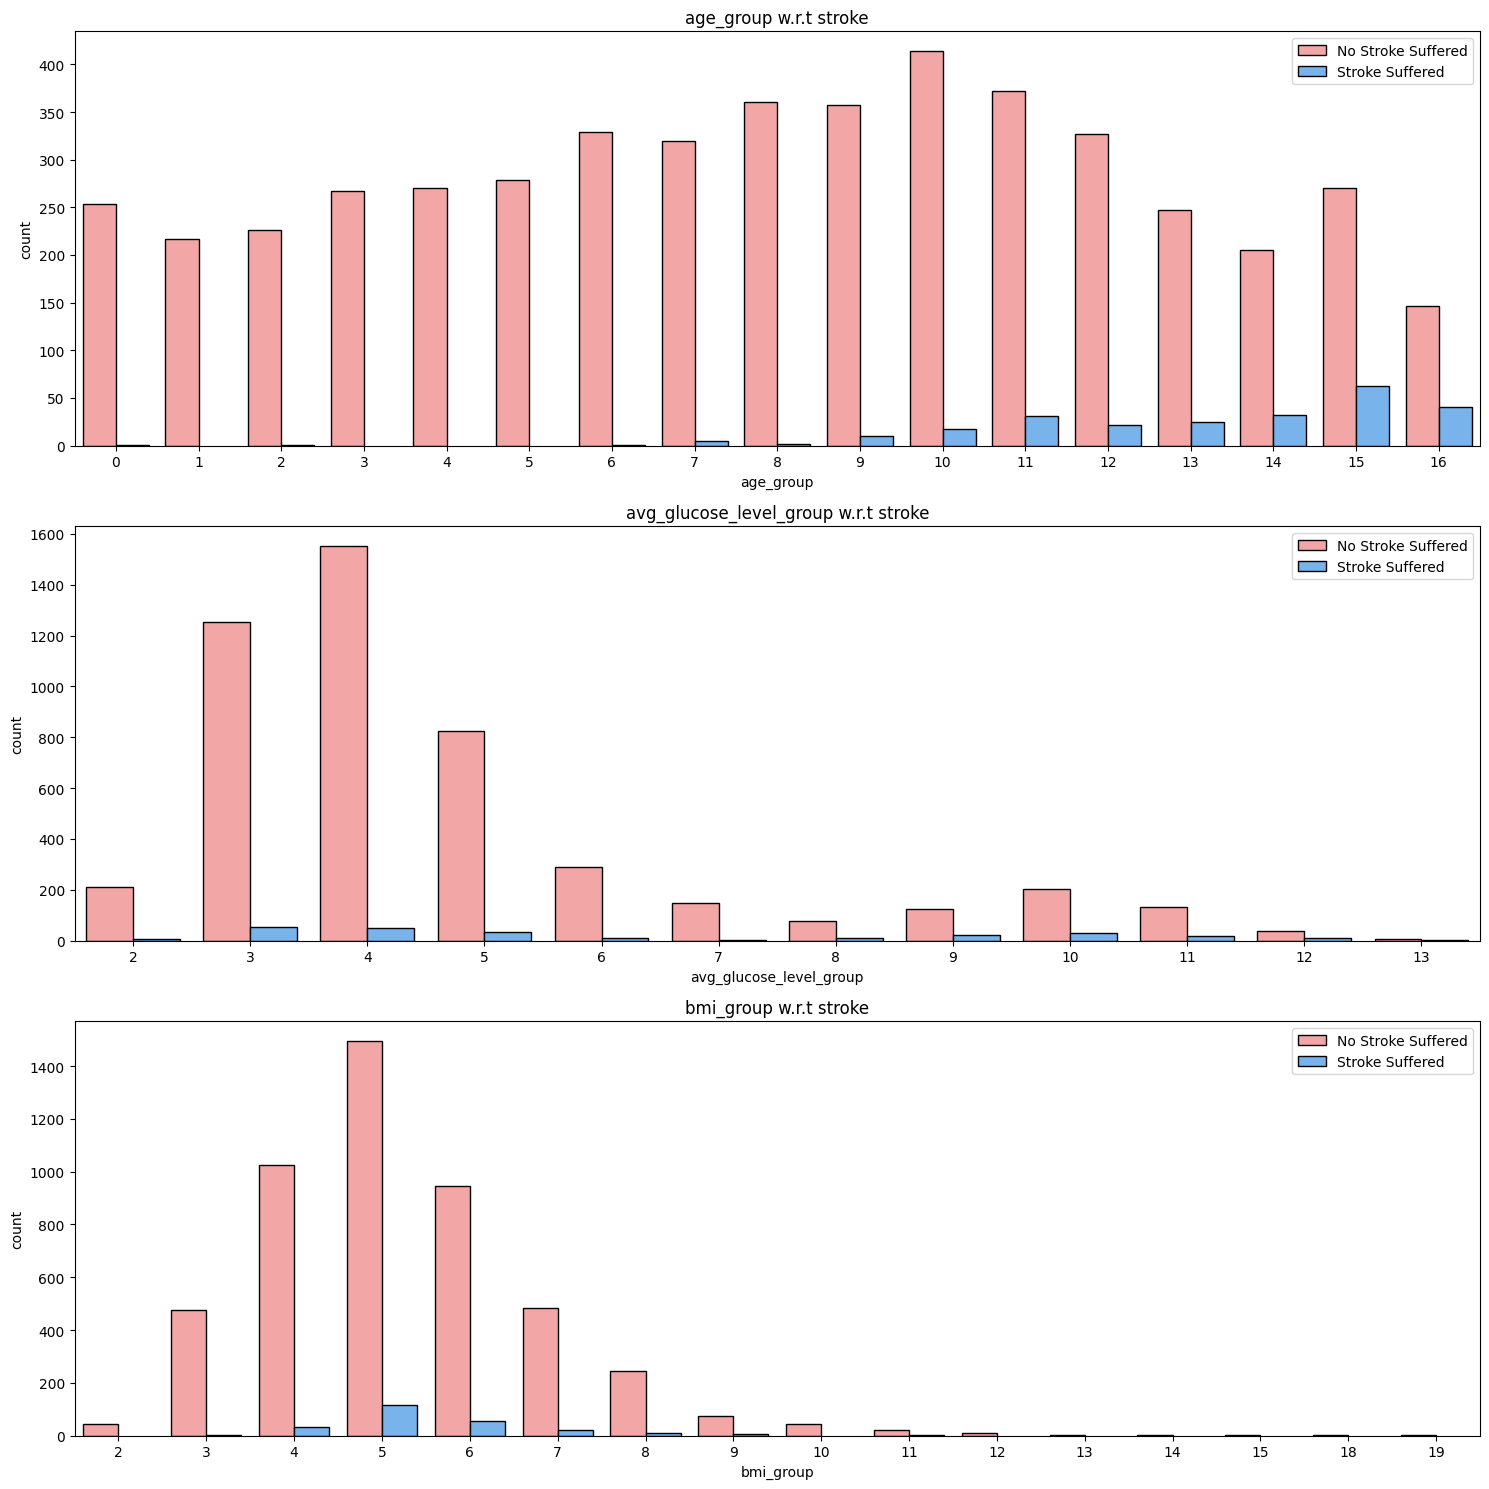

In [27]:
group_numerical_features = ['age_group', 'avg_glucose_level_group', 'bmi_group']

fig, ax = plt.subplots(nrows = 3, ncols = 1, figsize = (15, 15))
for i in range(len(group_numerical_features)):
    plt.subplot(3, 1, i + 1)
    sns.countplot(x=group_numerical_features[i], data=df1, hue="stroke", palette=colors, edgecolor='black')
    plt.legend(['No Stroke Suffered', 'Stroke Suffered'], loc='upper right')
    title = group_numerical_features[i] + ' w.r.t stroke'
    plt.title(title)

plt.tight_layout()
plt.show()


- For **age**, cases of **stroke suffered** can be observed for the values between **35**(7x5) - **80**(16x5). It is not a dominant patch due to the imbalance nature of the dataset.  
- For **avg_glucose_level**, 2 groups can be found : **60**(3x20) - **100**(5x20) & **180**(9x20) - **220**(11x20). Patients with **avg_glucose_level** present in the 1st group are more prone to suffering **stroke** than group 2.
- **bmi** values from **15**(3x5) - **40**(8x5) have displayed more cases of **stroke**.

### Categorical Features :

#### Distribution of Categorical Features :

In [28]:
categorical_features.remove('stroke')

- We remove the **stroke** feature from the list of categorical features as it is the target variable and we will treat it separately

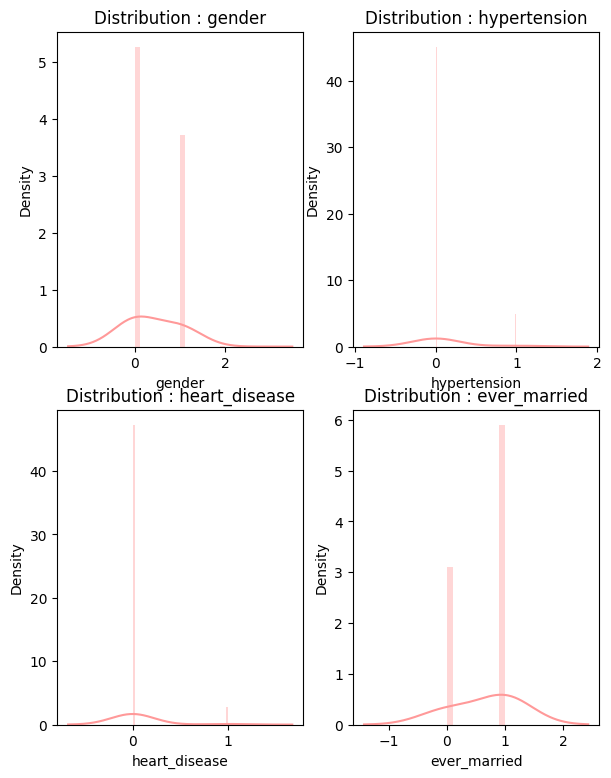

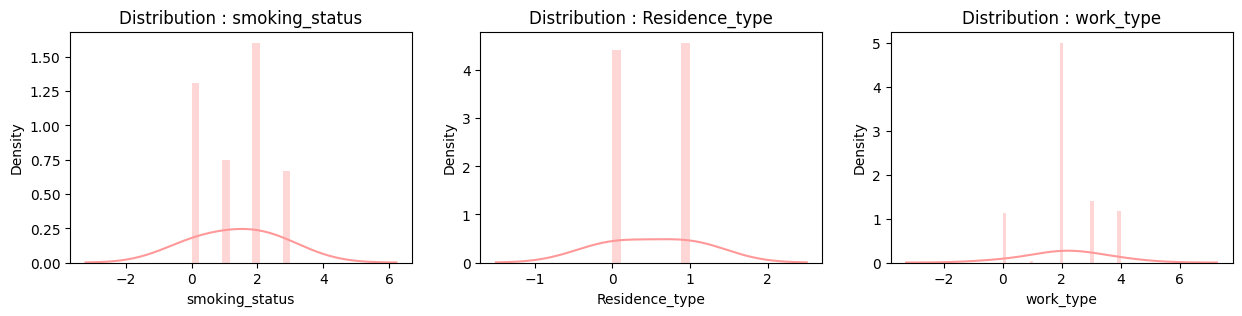

In [29]:
fig, ax = plt.subplots(nrows = 2,ncols = 2,figsize = (7,9))
for i in range(len(categorical_features[:4])):
    plt.subplot(2,2,i+1)
    sns.distplot(df1[categorical_features[i]],kde_kws = {'bw' : 1},color = colors[0]);
    title = 'Distribution : ' + categorical_features[i]
    plt.title(title)

fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,3))
for i in range(-1,-4,-1):
    plt.subplot(1,3,-i)
    sns.distplot(df1[categorical_features[i]],kde_kws = {'bw' : 1},color = colors[0]);
    title = 'Distribution : ' + categorical_features[i]
    plt.title(title)

- All the categorical features are **Normally Distributed**.

### Categorical Features w.r.t Target Variable (stroke) :

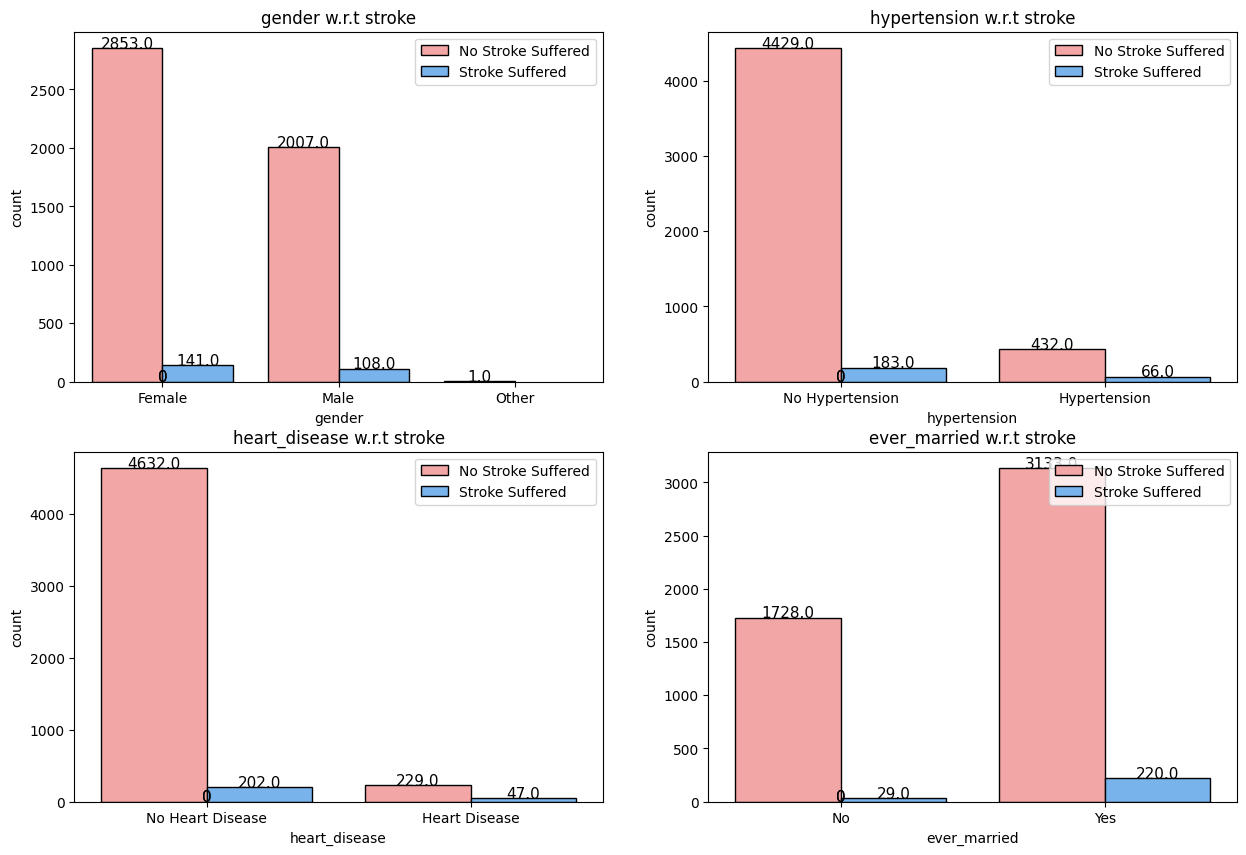

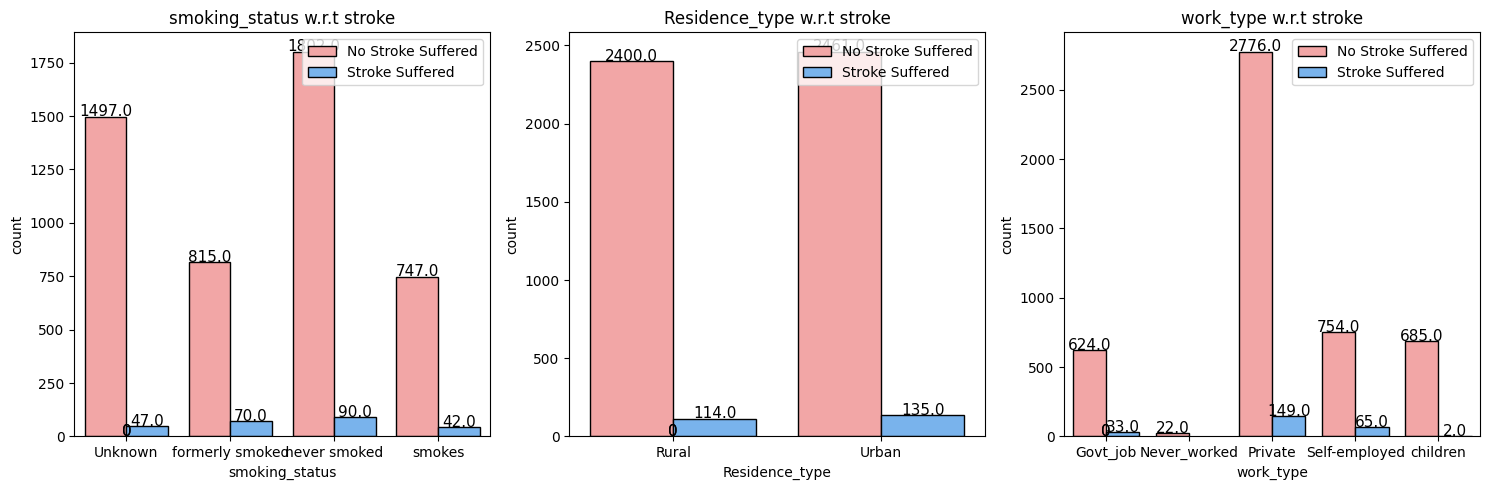

In [30]:
fig = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
for i in range(4):
    plt.subplot(2, 2, i + 1)
    ax = sns.countplot(x=categorical_features[i], data=df1, hue="stroke", palette=colors, edgecolor='black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize=11)
    ax.set_xticklabels([tf1[categorical_features[i]][j] for j in sorted(df1[categorical_features[i]].unique())])
    plt.legend(['No Stroke Suffered', 'Stroke Suffered'], loc='upper right')
    title = categorical_features[i] + ' w.r.t stroke'
    plt.title(title)

fig = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
for i in range(-1, -4, -1):
    plt.subplot(1, 3, -i)
    ax = sns.countplot(x=categorical_features[i], data=df1, hue="stroke", palette=colors, edgecolor='black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize=11)
    ax.set_xticklabels([tf1[categorical_features[i]][j] for j in sorted(df1[categorical_features[i]].unique())])
    plt.legend(['No Stroke Suffered', 'Stroke Suffered'], loc='upper right')
    title = categorical_features[i] + ' w.r.t stroke'
    plt.title(title)

plt.tight_layout()
plt.show()


- All the graphs near about share the same pattern i.e displaying low number of **stroke** cases and no clear cut reason to point towards.  
- **Female** population has recorded more cases of **stroke** than **male**.
- Interestingly, people with **no hypertension** & **no heart disease** have displayed to be more prone to **suffering stroke** than people that have these medical conditions.
- According to the dataset, people that have been **married** have **suffered stroke** more than those people who have never married.
- When it comes to **smoking_status**, people that have **never smoked** have topped the numbers with **formerly smoked** people coming at the 2nd position to record **stroke** cases.
- Not much info can be gained from **Residence_type** & **work_type**, however **Private** workers **suffered stroke** cases more than any other worker.

### Categorical Features w.r.t Positive Cases of stroke :

In [31]:
gender = df1[df1['stroke'] == 1]['gender'].value_counts()
gender = [gender[0] / sum(gender) * 100, gender[1] / sum(gender) * 100]

hypertension = df1[df1['stroke'] == 1]['hypertension'].value_counts()
hypertension = [hypertension[0] / sum(hypertension) * 100, hypertension[1] / sum(hypertension) * 100]

heart_disease = df1[df1['stroke'] == 1]['heart_disease'].value_counts()
heart_disease = [heart_disease[0] / sum(heart_disease) * 100, heart_disease[1] / sum(heart_disease) * 100]

ever_married = df1[df1['stroke'] == 1]['ever_married'].value_counts()
ever_married = [ever_married[0] / sum(ever_married) * 100, ever_married[1] / sum(ever_married) * 100]

work_type = df1[df1['stroke'] == 1]['work_type'].value_counts()
work_type = [work_type[0] / sum(work_type) * 100, work_type[2] / sum(work_type) * 100,
             work_type[3] / sum(work_type) * 100, work_type[4] / sum(work_type) * 100,]

Residence_type = df1[df1['stroke'] == 1]['Residence_type'].value_counts()
Residence_type = [Residence_type[0] / sum(Residence_type) * 100, Residence_type[1] / sum(Residence_type) * 100]

smoking_status = df1[df1['stroke'] == 1]['smoking_status'].value_counts()
smoking_status = [smoking_status[0] / sum(smoking_status) * 100, smoking_status[1] / sum(smoking_status) * 100,
                  smoking_status[2] / sum(smoking_status) * 100, smoking_status[3] / sum(smoking_status) * 100]

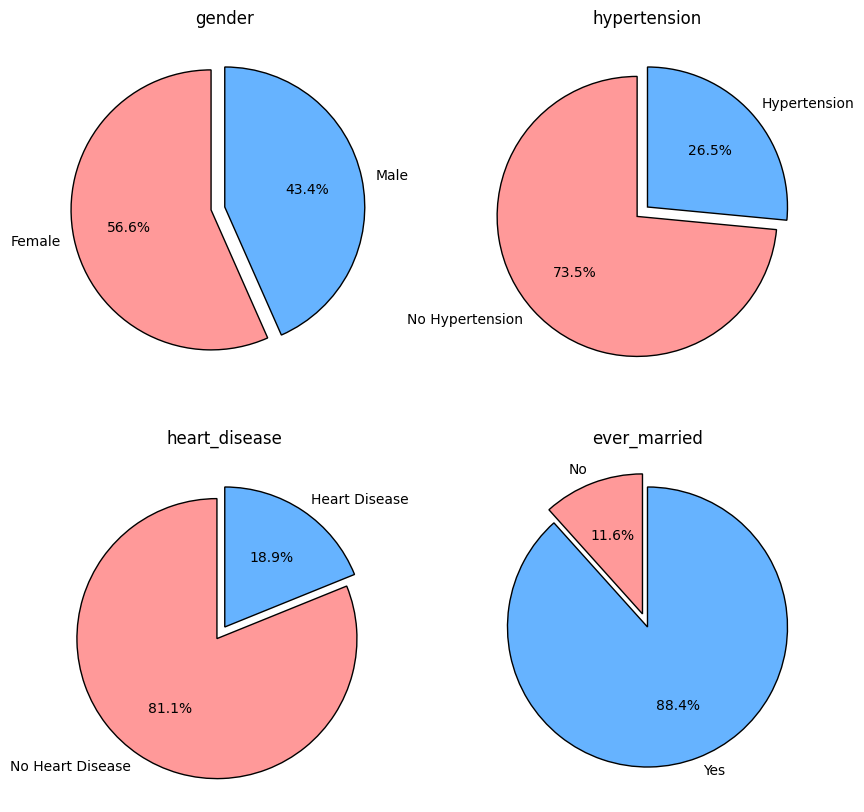

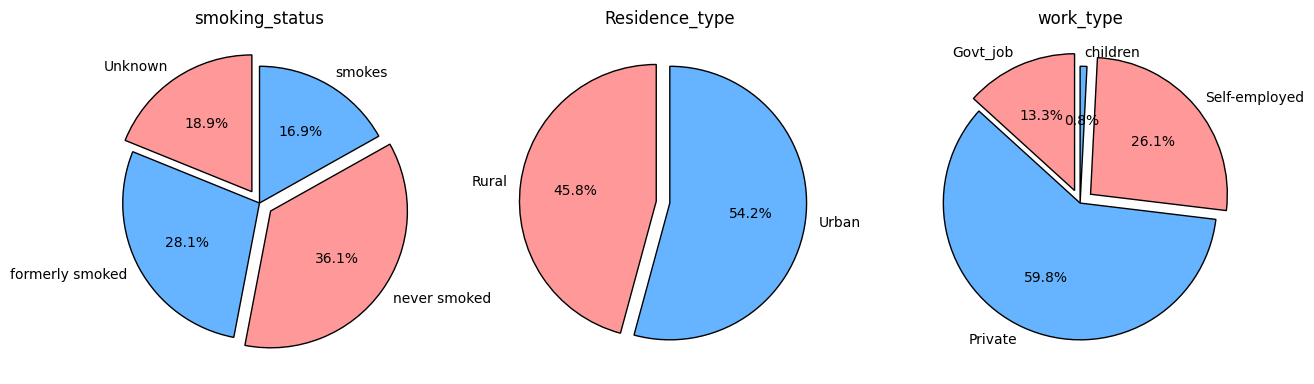

In [32]:
l1 = [gender, hypertension, heart_disease, ever_married, work_type, Residence_type, smoking_status]

ax,fig = plt.subplots(nrows = 2,ncols = 2,figsize = (10,10))
for i in range(4):
    if len(l1[i]) == 2:
        plt.subplot(2,2,i + 1)
        plt.pie(l1[i],labels = [tf1[categorical_features[i]][j] for j in sorted(df1[df1['stroke'] == 1][categorical_features[i]].unique())],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
               wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
        plt.title(categorical_features[i]);
    else:
        plt.subplot(2,2,i + 1)
        plt.pie(l1[i],labels = [tf1[categorical_features[i]][j] for j in sorted(df1[df1['stroke'] == 1][categorical_features[i]].unique())],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1,0),colors = colors,
               wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
        plt.title(categorical_features[i]);

ax,fig = plt.subplots(nrows = 1,ncols = 3,figsize = (15,15))
for i in range(-1,-4,-1):
    if len(l1[i]) == 2:
        plt.subplot(1,3,-i)
        plt.pie(l1[i],labels = [tf1[categorical_features[i]][j] for j in sorted(df1[df1['stroke'] == 1][categorical_features[i]].unique())],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
               wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
        plt.title(categorical_features[i]);
    else:
        plt.subplot(1,3,-i)
        plt.pie(l1[i],labels = [tf1[categorical_features[i]][j] for j in sorted(df1[df1['stroke'] == 1][categorical_features[i]].unique())],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1,0),colors = colors,
               wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
        plt.title(categorical_features[i]);

- According to the data, **female** population is more susceptible to **suffering stroke**.
- From the above visuals, surprisingly, **stroke** cases were found more in patients that **did not have any medical conditions like heart_disease or hypertension**
- People that have been **married** have the highest probability of suffering from **stroke**.
- When it comes to **stroke & smoking_status**, people that have **never smoked** are most susceptible. They are followed by **formerly smoked**. Surprisingly, people that **smokes** have the lowest chances of **suffering from stroke**.
- People living in **Urban Residence Type** have edged the people living in **Rural Residence Type** in terms of **stroke** cases.
- When it comes to **work_type**, people working in **Private** have recorded more than **50%+** of **stroke** cases. It is followed by **Self-employed** & **Govt_job** that record half and quarter of the cases that **Private** recorderd respectively.


- **Categorical Features (Order) :**
    
    - **gender** : female > male
    - **hypertension** : no hypertension > hypertension
    - **heart_disease** : no heart disease > heart disease
    - **ever_married** : married > no married
    - **working_type** : Private > Self-employed > Govt_job > children
    - **Residence_type** : Urban > Rural
    - **smoking_status** : never smoked > formerly smoked > smokes


- **Discrete Features (Range) :**
    
    - **age** : 55 - 80
    - **avg_glucose_level** : 80 - 200
    - **bmi** : 20 - 40


- **According to the data, these order / range of values leads to heart failures.**

# **Domain Info**


- **Categorical Features (Order) :**
    
    - **gender** : male > female
    - **hypertension** : hypertension > no hypertension
    - **heart_disease** : heart disease > no heart disease
    - **ever_married** : married = not married
    - **working_type** : Stress of the work can lead to stroke.
    - **Residence_type** : Mortality due to stroke is higher in rural areas than urban areas due to poor medical treatment.
    - **smoking_status** : Smoking increases the risk of stroke.


- **Discrete Features (Range) :**
    
    - **age** : The chance of having a stroke about doubles every 10 years after age 55.
    - **avg_glucose_level** : High blood glucose is found in stroke cases. A value of 126+ has been observed alot.
    - **bmi** : High bmi values increases the chances of ischemic stroke.


- All the information mentioned is gathered from websites and research papers. We will use this information for cross checking the summary of EDA and feature selection.


- Conclusions obtained from the EDA contradict the Domain Information for the features : **hypertension**, **heart_disease** and **smoking_status**.


- This difference is probably because of the **Unbalanced dataset**


- Thus, we will carry out the feature engineering process, balance the dataset using **SMOTE**

# **Feature Engineering**

- The dataset is **Unbalanced** with a bias towards **No Stroke** in a ratio of **19 : 1** for **No Stroke : Stroke**. We will first balance the dataset using **SMOTE**

- In order to cope with unbalanced data, there are 2 options :

    - **Undersampling** : Trim down the majority samples of the target variable.
    - **Oversampling** : Increase the minority samples of the target variable to the majority samples.
    
- For best performances, combination of undersampling and oversampling is recommended.
- First, we will undersample the majority samples and it is followed by oversampling minority samples.
- For data balancing, we will use **imblearn**.
- **PIP statement** : pip install imbalanced-learn

In [33]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


### Data Balancing using SMOTE :

In [34]:
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [35]:
over = SMOTE(sampling_strategy = 1)
under = RandomUnderSampler(sampling_strategy = 0.1)
f1 = df1.drop(columns=['stroke'])
t1 = df1['stroke']

steps = [('under', under),('over', over)]
pipeline = Pipeline(steps=steps)
f1, t1 = pipeline.fit_resample(f1, t1)
Counter(t1)

Counter({0: 2490, 1: 2490})

In [36]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,0,1,Yes,Private,Urban,228.69,36.60,formerly smoked,1
1,Female,61,0,0,Yes,Self-employed,Rural,202.21,28.89,never smoked,1
2,Male,80,0,1,Yes,Private,Rural,105.92,32.50,never smoked,1
3,Female,49,0,0,Yes,Private,Urban,171.23,34.40,smokes,1
4,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.00,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80,1,0,Yes,Private,Urban,83.75,28.89,never smoked,0
5106,Female,81,0,0,Yes,Self-employed,Urban,125.20,40.00,never smoked,0
5107,Female,35,0,0,Yes,Self-employed,Rural,82.99,30.60,never smoked,0
5108,Male,51,0,0,Yes,Private,Rural,166.29,25.60,formerly smoked,0


In [37]:
df1

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group,avg_glucose_level_group,bmi_group
0,1,67,0,1,1,2,1,228.69,36.60,1,1,13,11,7
1,0,61,0,0,1,3,0,202.21,28.89,2,1,12,10,5
2,1,80,0,1,1,2,0,105.92,32.50,2,1,16,5,6
3,0,49,0,0,1,2,1,171.23,34.40,3,1,9,8,6
4,0,79,1,0,1,3,0,174.12,24.00,2,1,15,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80,1,0,1,2,1,83.75,28.89,2,0,16,4,5
5106,0,81,0,0,1,3,1,125.20,40.00,2,0,16,6,8
5107,0,35,0,0,1,3,0,82.99,30.60,2,0,7,4,6
5108,1,51,0,0,1,2,0,166.29,25.60,1,0,10,8,5


### Calculation for Data Balancing :

- **Sampling Strategy** : It is a ratio which is the common paramter for oversampling and undersampling.
- **Sampling Strategy** : **( Samples of Minority Class ) / ( Samples of Majority Class )**


- In this case,

    - **Majority Class : No Stroke** : 4861 samples
    - **Minority Class : Stroke** : 249 samples


### Undersampling : Trim down the majority class samples

- Sampling_Strategy = 0.1
- 0.1 = ( 249 ) / Majority Class Samples
- After undersampling,

    - **Majority Class : No Stroke** : 2490 samples
    - **Minority Class : Stroke** : 249 samples


### Oversampling : Increase the minority class samples

- Sampling_Strategy = 1
- 1 = ( Minority Class Samples ) / 2490
- After oversampling,

    - **Majority Class : No Stroke** : 2490 samples
    - **Minority Class : Stroke** : 2490 samples
    

- Final Class Samples :

    - **Majority Class : No Stroke** : 2490 samples
    - **Minority Class : Stroke** : 2490 samples


- Here, we balance the data by reducing the majority group samples & then increasing the minority group to majority group.
- For imbalanced datasets, we **duplicate the data** to deal with the potential bias in the predictions.
- Due to this duplication process, we are using **synthetic data** for modeling purposes to ensure that the predictions are not skewed towards the majority target class value.
- Thus, evaluating models using **accuracy** will be misleading. Instead, we will go for **confusion matrix, ROC-AUC graph and ROC-AUC score** for model evaluation.

In [38]:
f1

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,age_group,avg_glucose_level_group,bmi_group
0,0,30,0,0,0,2,0,73.69,17.30,2,6,3,3
1,0,51,0,1,1,3,1,100.96,33.40,2,10,5,6
2,1,47,0,0,1,2,0,91.05,31.10,1,9,4,6
3,0,17,0,0,0,2,1,67.87,24.90,1,3,3,4
4,1,64,1,0,1,3,0,85.66,28.50,2,12,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4975,1,73,1,0,1,2,0,243.12,38.78,1,14,12,7
4976,0,75,0,0,1,2,0,199.55,27.81,1,15,9,5
4977,0,59,0,0,1,2,0,118.47,35.74,3,11,5,7
4978,1,62,0,0,1,2,1,115.76,34.09,1,11,5,6


In [39]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(f1, t1, test_size = 0.15, random_state = 2)

### Correlation Matrix :

In [40]:
x_train_test = x_train.copy(deep = True)
x_train_test['stroke'] = y_train

- In order to visualize the correlation matrix, we create a new dataframe that contains values from **x_train** & **y_train**.
- Thus, we reject anything outside the training data to avoid data leakage.

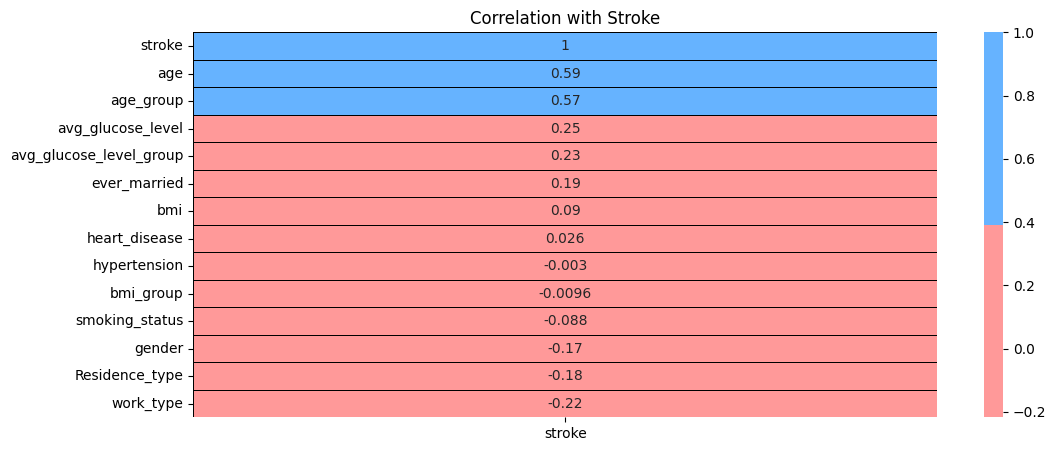

In [41]:
# Compute correlation
corr = x_train_test.corrwith(x_train_test['stroke']).sort_values(ascending=False).to_frame()
corr.columns = ['stroke']

# Create a single plot
fig, ax = plt.subplots(figsize=(12, 5))
sns.heatmap(corr, annot=True, cmap=colors, linewidths=0.4, linecolor='black', ax=ax)

# Title
ax.set_title('Correlation with Stroke')

plt.show()


- **age** displays a strong positive correlation with **stroke**. **avg_glucose_level** & **ever_married** display some kind of positive correlation. Opposite to positive correlation, **gender**, **Residence_type** & **work_type** have negative correlation with the **stroke**.
- **age**, **heart_disease**, **avg_glucose_level**, **hypertension** & **ever_married** display some kind of positive correlation. Overall, all the features have a value very close to 0, displaying neutral correlation with **stroke**.

- Mutual Information Score of **stroke** with categorical features display very low score..
- According to the above scores, none of the features should be selected for modeling.

#### Chi Squared Test :

In [42]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


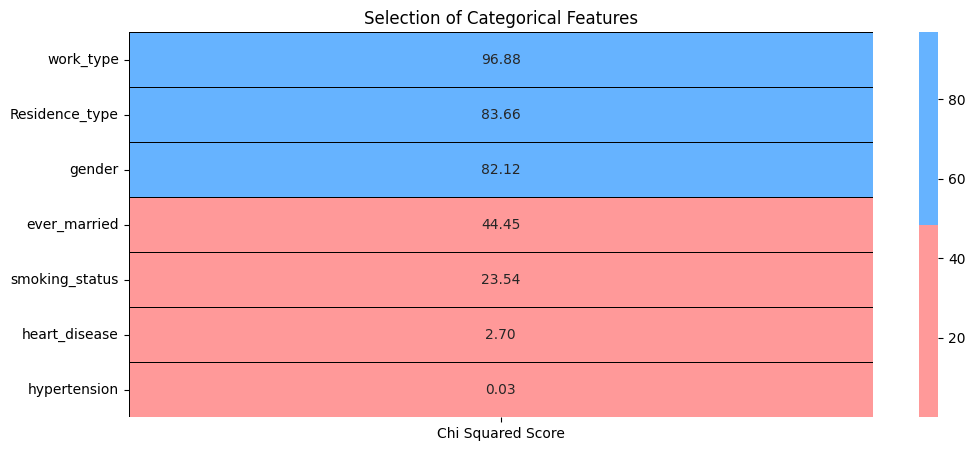

In [43]:

# Selecting categorical features
features = x_train.loc[:, categorical_features]
target = y_train

# Apply Chi-Squared test
best_features = SelectKBest(score_func=chi2, k='all')
fit = best_features.fit(features, target)

# Convert scores to DataFrame
featureScores = pd.DataFrame(data=fit.scores_, index=list(features.columns), columns=['Chi Squared Score'])

# Create single plot
fig, ax = plt.subplots(figsize=(12, 5))
sns.heatmap(featureScores.sort_values(ascending=False, by='Chi Squared Score'),
            annot=True, cmap=colors, linewidths=0.4, linecolor='black', fmt='.2f', ax=ax)

# Title
ax.set_title('Selection of Categorical Features')

plt.show()

- We should reject the features that have low values. We will reject features with scores less than 20. Hence, we will not use :  **heart_disease** & **hypertension**.


### Feature Selection for Numerical Features :

#### ANOVA Test :

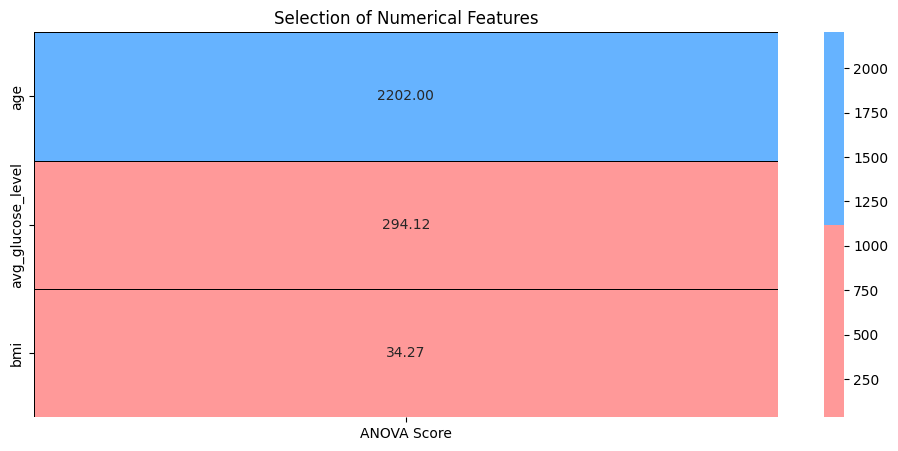

In [44]:
from sklearn.feature_selection import f_classif

# Selecting numerical (discrete) features
features = x_train.loc[:, discrete_features]
target = y_train

# Apply ANOVA F-test
best_features = SelectKBest(score_func=f_classif, k='all')
fit = best_features.fit(features, target)

# Convert scores to DataFrame
featureScores = pd.DataFrame(data=fit.scores_, index=list(features.columns), columns=['ANOVA Score'])

# Create single plot
fig, ax = plt.subplots(figsize=(12, 5))
sns.heatmap(featureScores.sort_values(ascending=False, by='ANOVA Score'),
            annot=True, cmap=colors, linewidths=0.4, linecolor='black', fmt='.2f', ax=ax)

# Title
ax.set_title('Selection of Numerical Features')

plt.show()

- From the above ANOVA Scores, we ignore the features with values less than 30. Hence, we reject **bmi** for modeling.
- We ready the datasets for data scaling by dropping the features based on the above statistical tests.

In [45]:
x_train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,age_group,avg_glucose_level_group,bmi_group
1815,0,58,0,0,1,3,0,81.96,34.60,2,11,4,6
307,0,36,0,0,1,2,1,72.16,23.20,2,7,3,4
4974,0,79,1,0,0,2,0,63.73,32.46,2,15,3,6
2937,0,72,0,0,1,2,0,74.77,24.55,1,14,3,4
2637,0,78,0,0,1,2,1,67.29,24.60,2,15,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3335,0,76,0,0,0,2,1,90.01,28.50,0,15,4,5
1099,1,39,0,0,1,0,1,73.62,33.40,0,7,3,6
2514,1,71,0,0,1,2,1,102.87,27.20,1,14,5,5
3606,0,49,0,0,1,2,0,230.14,51.54,2,9,11,9


In [46]:
# Feature Selection:
x_train = x_train.drop(columns = ['heart_disease', 'hypertension', 'bmi'])
x_test = x_test.drop(columns = ['heart_disease', 'hypertension', 'bmi'])

### Data Scaling (Normalization and Standardization) :

In [47]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Create scalers per feature
scalers_std = {}
scalers_minmax = {}

# Normalize numeric columns with MinMaxScaler
numeric_cols = ['age', 'avg_glucose_level']
for col in numeric_cols:
    scaler = MinMaxScaler()
    x_train[col] = scaler.fit_transform(x_train[[col]])
    x_test[col] = scaler.transform(x_test[[col]])
    scalers_minmax[col] = scaler

# Standardize categorical-encoded columns with StandardScaler
cat_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
for col in cat_cols:
    scaler = StandardScaler()
    x_train[col] = scaler.fit_transform(x_train[[col]])
    x_test[col] = scaler.transform(x_test[[col]])
    scalers_std[col] = scaler


- Machine learning model does not understand the units of the values of the features. It treats the input just as a simple number but does not understand the true meaning of that value. Thus, it becomes necessary to scale the data.

- We have 2 options for data scaling :
    
    1) **Normalization**
    
    2) **Standardization**.


- As most of the algorithms assume the data to be normally (Gaussian) distributed, **Normalization** is done for features whose data does not display normal distribution and **standardization** is carried out for features that are normally distributed but the range of values is huge or small as compared to other features.

- From the above transformation, we fit the data on the training data and transform the test data from information based on the training data. If we check the formulas of the **Normalization** & **Standardization**, we use mean, standard deviation, min & max values.

In [48]:
import pandas as pd
x_train['stroke'] = y_train
x_test['stroke'] = y_test

# If you want to combine both the training and test data, you can use:
final_data = pd.concat([x_train, x_test], axis=0)  # Combine training and test data vertically



In [49]:
final_data.drop(columns=['bmi_group', 'avg_glucose_level_group','age_group' ], inplace=True)

In [50]:
final_data.columns

Index(['gender', 'age', 'ever_married', 'work_type', 'Residence_type',
       'avg_glucose_level', 'smoking_status', 'stroke'],
      dtype='object')

In [51]:
final_data

,gender,age,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke
1815,-0.70,0.71,0.62,1.04,-0.84,0.12,0.75,0
307,-0.70,0.44,0.62,0.02,1.19,0.08,0.75,0
4974,-0.70,0.96,-1.61,0.02,-0.84,0.04,0.75,1
2937,-0.70,0.88,0.62,0.02,-0.84,0.09,-0.29,1
2637,-0.70,0.95,0.62,0.02,1.19,0.06,0.75,1
...,...,...,...,...,...,...,...,...
955,1.44,0.73,0.62,0.02,-0.84,0.15,-0.29,0
739,-0.70,0.39,-1.61,0.02,1.19,0.09,1.79,0
3834,-0.70,0.98,0.62,0.02,-0.84,0.09,0.75,1
1923,1.44,1.00,0.62,0.02,1.19,0.75,-0.29,0


In [52]:
final_data.to_csv('final_stroke_dataset.csv', index=False)

Finally, we save the final version of the dataset after the data wrangling and normalization and feature selection as CSV, which we can use later for training our model.

# Assignment 3: Data Visualization

In [1]:
# Install missing libraries if needed
!pip install pandas matplotlib seaborn wordcloud

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Load your transformed dataset
df = pd.read_csv('final_stroke_dataset.csv')  # <-- Change filename if needed

# Quick view
df.head()


,gender,age,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke
0,-0.69586,0.707317,0.621695,1.035625,-0.839519,0.123904,0.754378,0
1,-0.69586,0.439024,0.621695,0.015425,1.191158,0.078663,0.754378,0
2,-0.69586,0.963415,-1.608505,0.015425,-0.839519,0.039752,0.754378,1
3,-0.69586,0.878049,0.621695,0.015425,-0.839519,0.090695,-0.286118,1
4,-0.69586,0.951220,0.621695,0.015425,1.191158,0.056181,0.754378,1


In [2]:
# Manual column categorization based on original meaning
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']
numerical_cols = ['age', 'avg_glucose_level']

# Summary statistics for numerical columns
print("Summary Statistics (Numerical Features):")
print(df[numerical_cols].describe())

# Value counts for categorical columns
print("\nValue Counts (Categorical Features):")
for col in categorical_cols:
    print(f"\n{col} Value Counts:\n{df[col].value_counts()}")


Summary Statistics (Numerical Features):
               age  avg_glucose_level
count  4980.000000        4980.000000
mean      0.668513           0.290460
std       0.269665           0.254157
min       0.000000           0.000000
25%       0.512195           0.103621
50%       0.719512           0.188636
75%       0.914634           0.412787
max       1.000000           1.000000

Value Counts (Categorical Features):

gender Value Counts:
gender
-0.69586    3360
 1.43707    1620
Name: count, dtype: int64

ever_married Value Counts:
ever_married
 0.621695    3598
-1.608505    1382
Name: count, dtype: int64

work_type Value Counts:
work_type
 0.015425    3097
 1.035625     646
-2.024975     622
 2.055825     363
-1.004775     252
Name: count, dtype: int64

Residence_type Value Counts:
Residence_type
-0.839519    2913
 1.191158    2067
Name: count, dtype: int64

smoking_status Value Counts:
smoking_status
 0.754378    1721
-0.286118    1434
-1.326613    1334
 1.794873     491
Name: count,

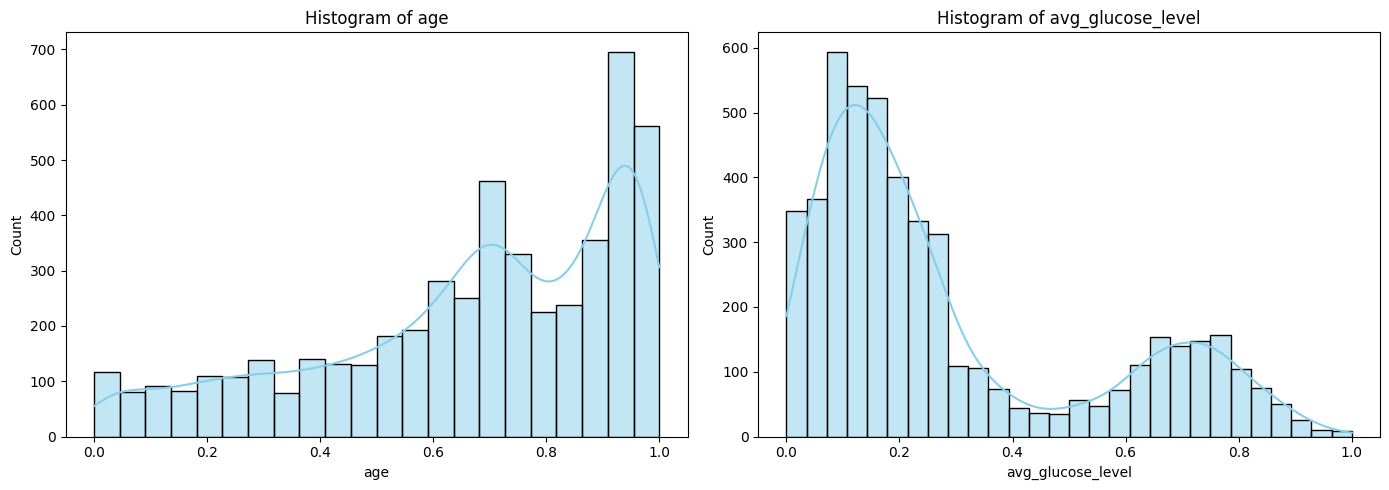

In [3]:
fig, axes = plt.subplots(1, len(numerical_cols), figsize=(14, 5))
for ax, col in zip(axes, numerical_cols):
    sns.histplot(df[col], kde=True, ax=ax, color='skyblue')
    ax.set_title(f'Histogram of {col}')
plt.tight_layout()
plt.show()


In [4]:
# Helper function to safely map gender
def map_gender(x):
    if x < 0:
        return 0  # Male
    else:
        return 1  # Female

def map_ever_married(x):
    if x < 0:
        return 0  # No
    else:
        return 1  # Yes

def map_work_type(x):
    if x < -1.5:
        return 0  # Govt Job
    elif x < -0.5:
        return 1  # Never Worked
    elif x < 0.5:
        return 2  # Private
    elif x < 1.5:
        return 3  # Self-employed
    else:
        return 4  # Children

def map_residence_type(x):
    if x < 0:
        return 0  # Rural
    else:
        return 1  # Urban

def map_smoking_status(x):
    if x < -0.5:
        return 0  # Formerly smoked
    elif x < 0.2:
        return 1  # Never smoked
    elif x < 1.2:
        return 2  # Smokes
    else:
        return 3  # Unknown

# Make a copy
df_plot = df.copy()

# Apply safe mappings
df_plot['gender'] = df_plot['gender'].apply(map_gender)
df_plot['ever_married'] = df_plot['ever_married'].apply(map_ever_married)
df_plot['work_type'] = df_plot['work_type'].apply(map_work_type)
df_plot['Residence_type'] = df_plot['Residence_type'].apply(map_residence_type)
df_plot['smoking_status'] = df_plot['smoking_status'].apply(map_smoking_status)
# Stroke is already 0 or 1


C:\Users\jawad\AppData\Local\Temp\ipykernel_8868\4184671447.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_plot[col], ax=ax, palette='Set2')
C:\Users\jawad\AppData\Local\Temp\ipykernel_8868\4184671447.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_plot[col], ax=ax, palette='Set2')
C:\Users\jawad\AppData\Local\Temp\ipykernel_8868\4184671447.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_plot[col], ax=ax, palette='Set2')
C:\Users\jawad\AppData\Local\Temp\ipykernel_8868\4184671447.py:3: FutureWarning: 

Passi

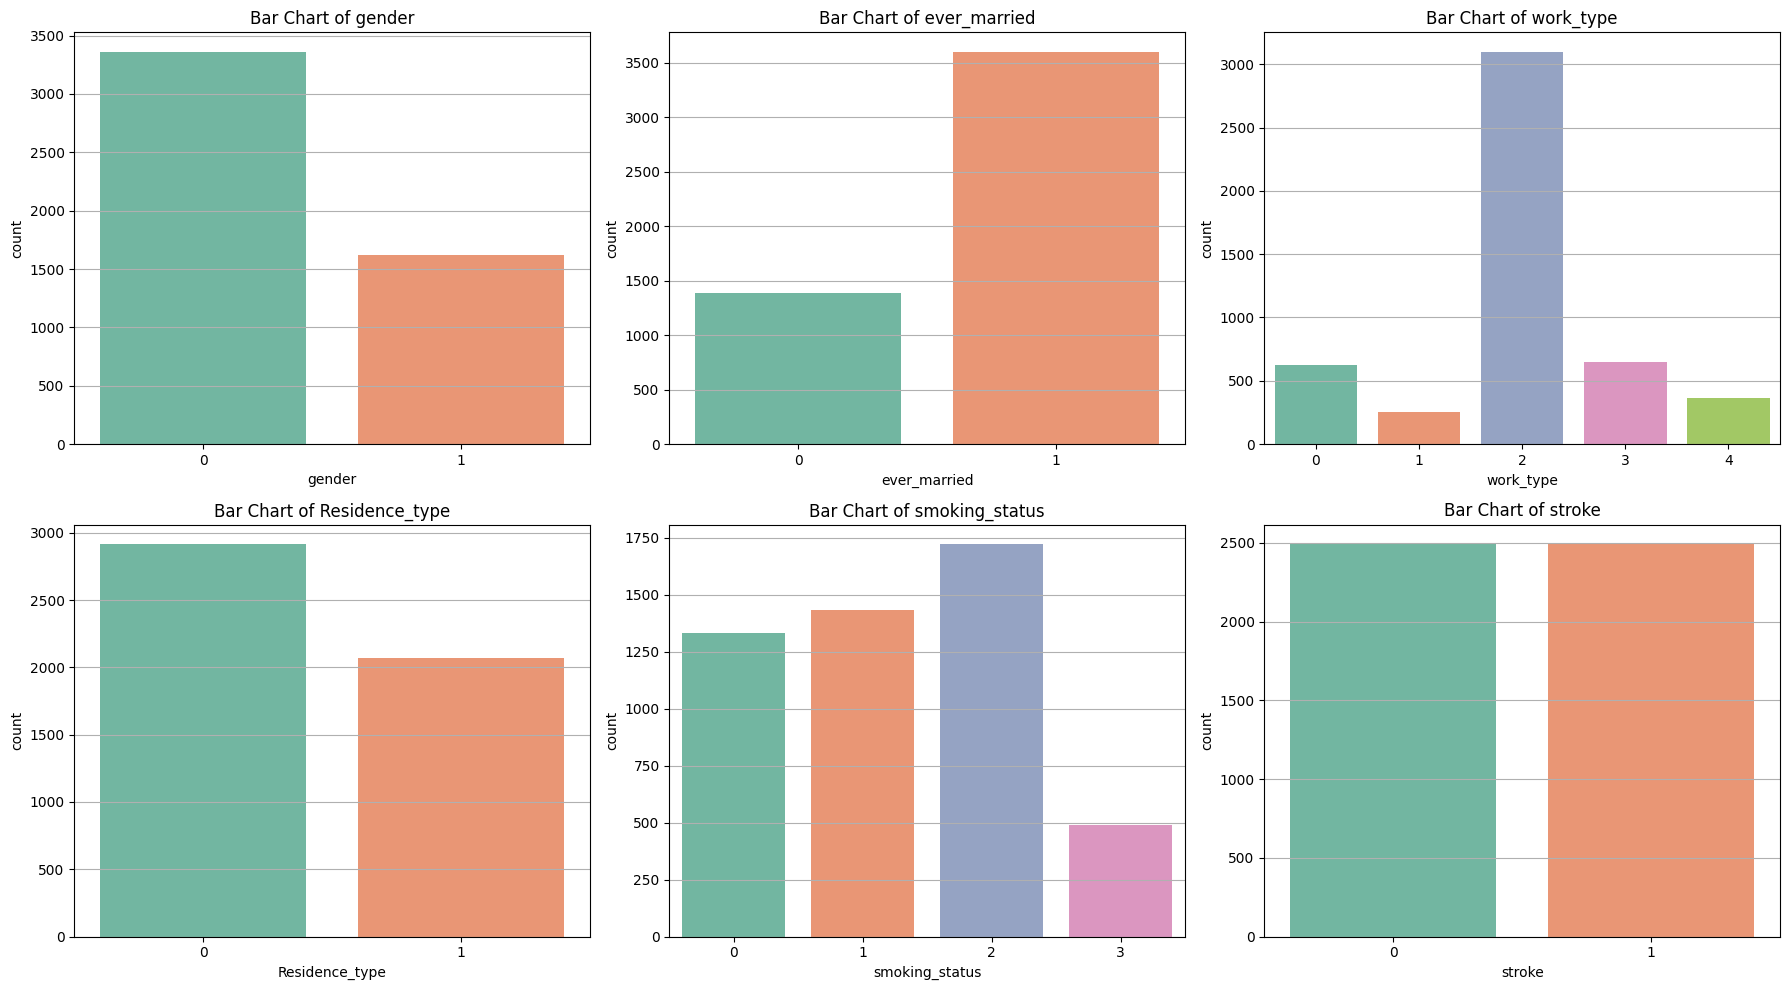

In [5]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))  # 2 rows, 3 cols for 6 categorical
for ax, col in zip(axes.flatten(), categorical_cols):
    sns.countplot(x=df_plot[col], ax=ax, palette='Set2')
    ax.set_title(f'Bar Chart of {col}')
    ax.grid(True, axis='y')
plt.tight_layout()
plt.show()


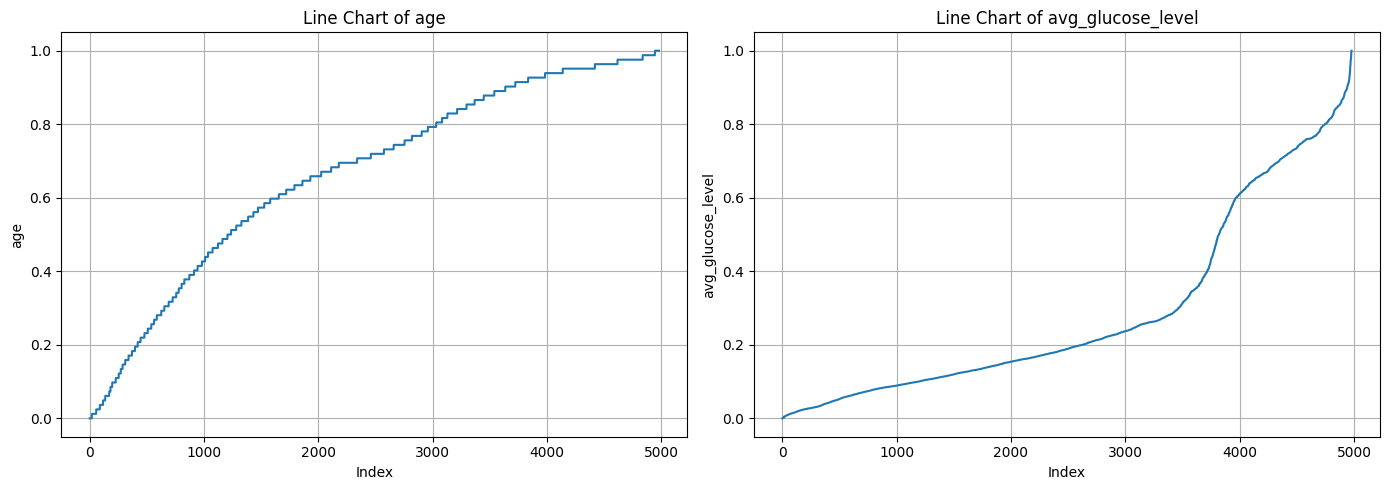

In [6]:
fig, axes = plt.subplots(1, len(numerical_cols), figsize=(14, 5))
for ax, col in zip(axes, numerical_cols):
    ax.plot(df[col].sort_values().values)
    ax.set_title(f'Line Chart of {col}')
    ax.set_xlabel('Index')
    ax.set_ylabel(col)
    ax.grid(True)
plt.tight_layout()
plt.show()


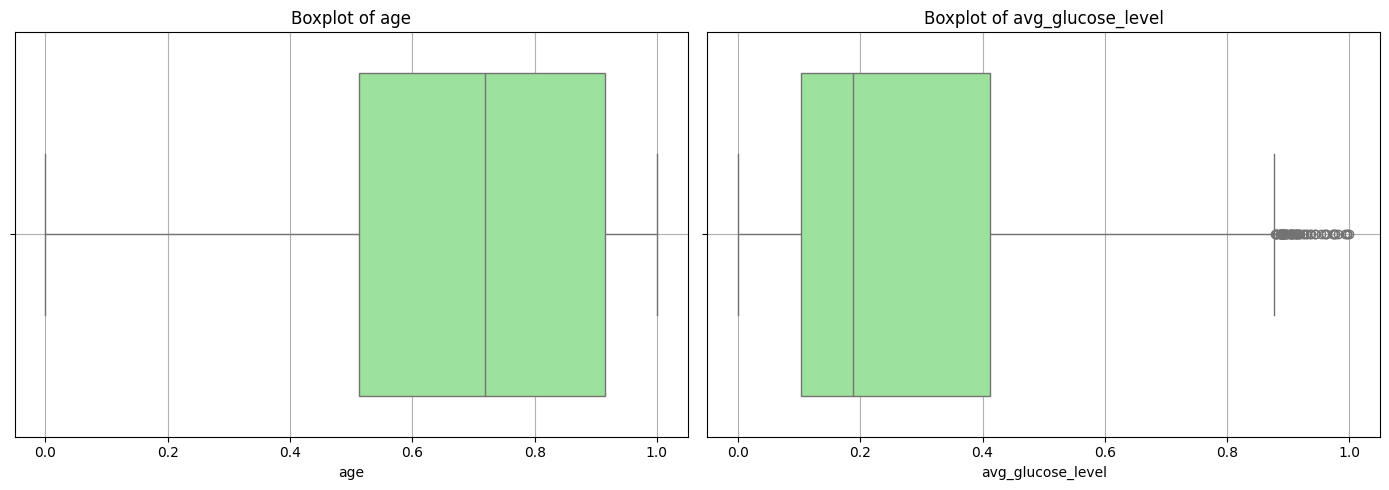

In [7]:
fig, axes = plt.subplots(1, len(numerical_cols), figsize=(14, 5))
for ax, col in zip(axes, numerical_cols):
    sns.boxplot(x=df[col], ax=ax, color='lightgreen')
    ax.set_title(f'Boxplot of {col}')
    ax.grid(True)
plt.tight_layout()
plt.show()


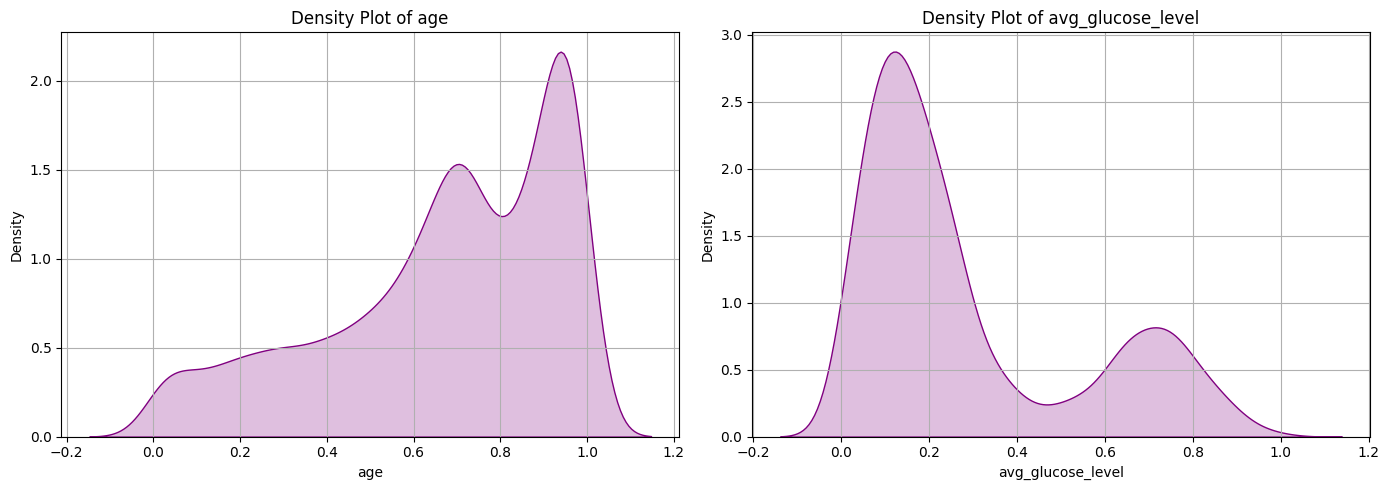

In [8]:
fig, axes = plt.subplots(1, len(numerical_cols), figsize=(14, 5))
for ax, col in zip(axes, numerical_cols):
    sns.kdeplot(df[col], fill=True, ax=ax, color='purple')
    ax.set_title(f'Density Plot of {col}')
    ax.grid(True)
plt.tight_layout()
plt.show()


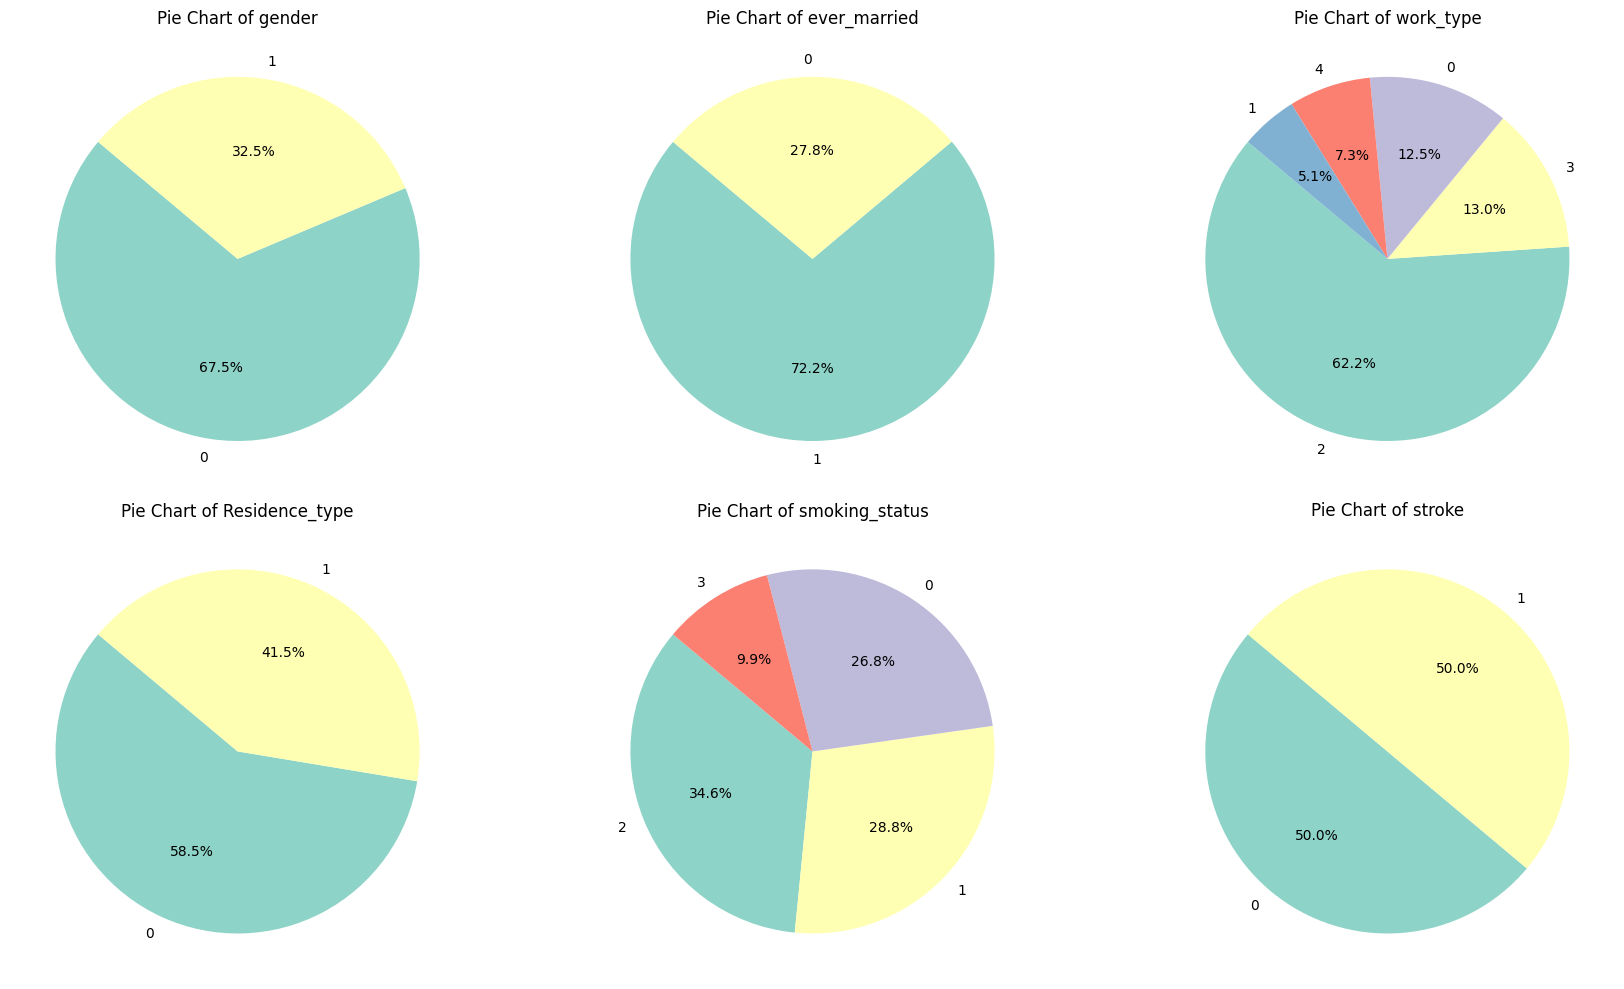

In [9]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
for ax, col in zip(axes.flatten(), categorical_cols):
    counts = df_plot[col].value_counts()
    ax.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3.colors)
    ax.set_title(f'Pie Chart of {col}')
plt.tight_layout()
plt.show()


## bivariate

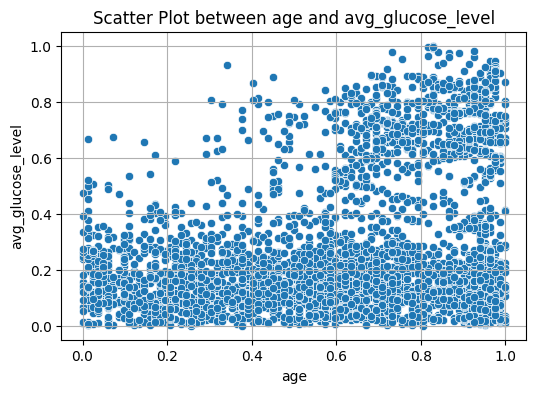

In [10]:
# Scatter plots for numerical features
import itertools

# Generate scatter plots for all pairs of numerical features
num_pairs = list(itertools.combinations(numerical_cols, 2))

for (col1, col2) in num_pairs:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df[col1], y=df[col2])
    plt.title(f'Scatter Plot between {col1} and {col2}')
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.grid(True)
    plt.show()


C:\Users\jawad\AppData\Local\Temp\ipykernel_8868\2495244382.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=df_plot['stroke'], y=df[col], estimator='mean', ci=None, ax=ax)
C:\Users\jawad\AppData\Local\Temp\ipykernel_8868\2495244382.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=df_plot['stroke'], y=df[col], estimator='mean', ci=None, ax=ax)


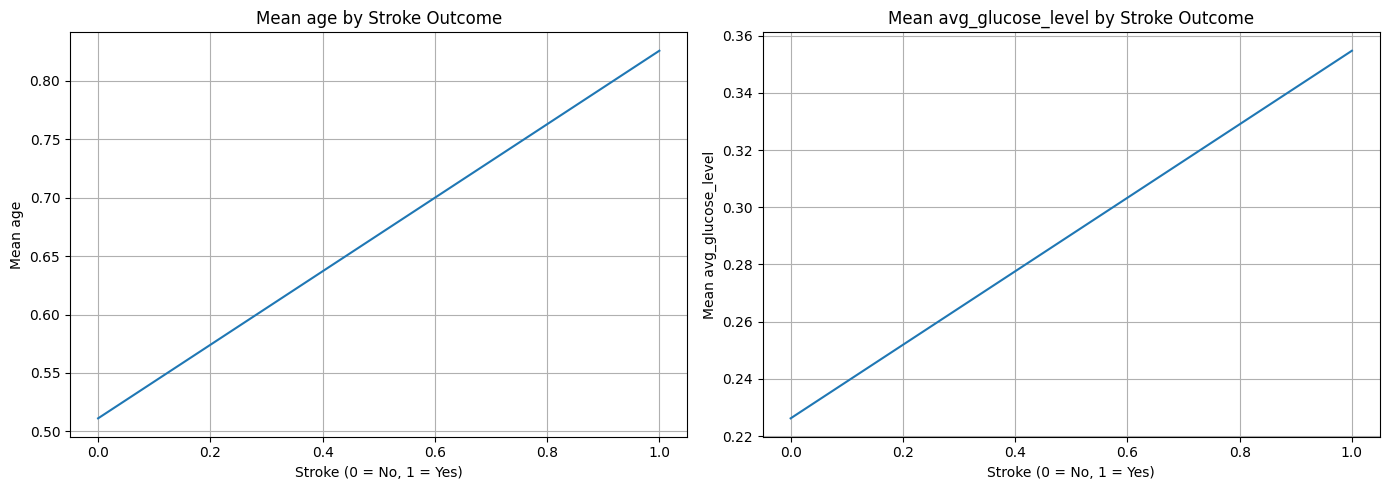

In [12]:
# Line plots: Mean age and glucose level by stroke outcome (grouped together)
fig, axes = plt.subplots(1, len(numerical_cols), figsize=(14, 5))
for ax, col in zip(axes, numerical_cols):
    sns.lineplot(x=df_plot['stroke'], y=df[col], estimator='mean', ci=None, ax=ax)
    ax.set_title(f'Mean {col} by Stroke Outcome')
    ax.set_xlabel('Stroke (0 = No, 1 = Yes)')
    ax.set_ylabel(f'Mean {col}')
    ax.grid(True)
plt.tight_layout()
plt.show()


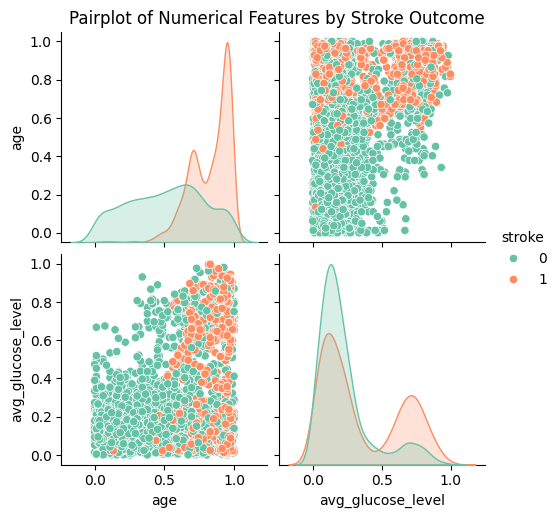

In [13]:
# Pairplot for numerical features colored by stroke outcome
sns.pairplot(df_plot, vars=numerical_cols, hue='stroke', palette='Set2', diag_kind='kde')
plt.suptitle('Pairplot of Numerical Features by Stroke Outcome', y=1.02)
plt.show()


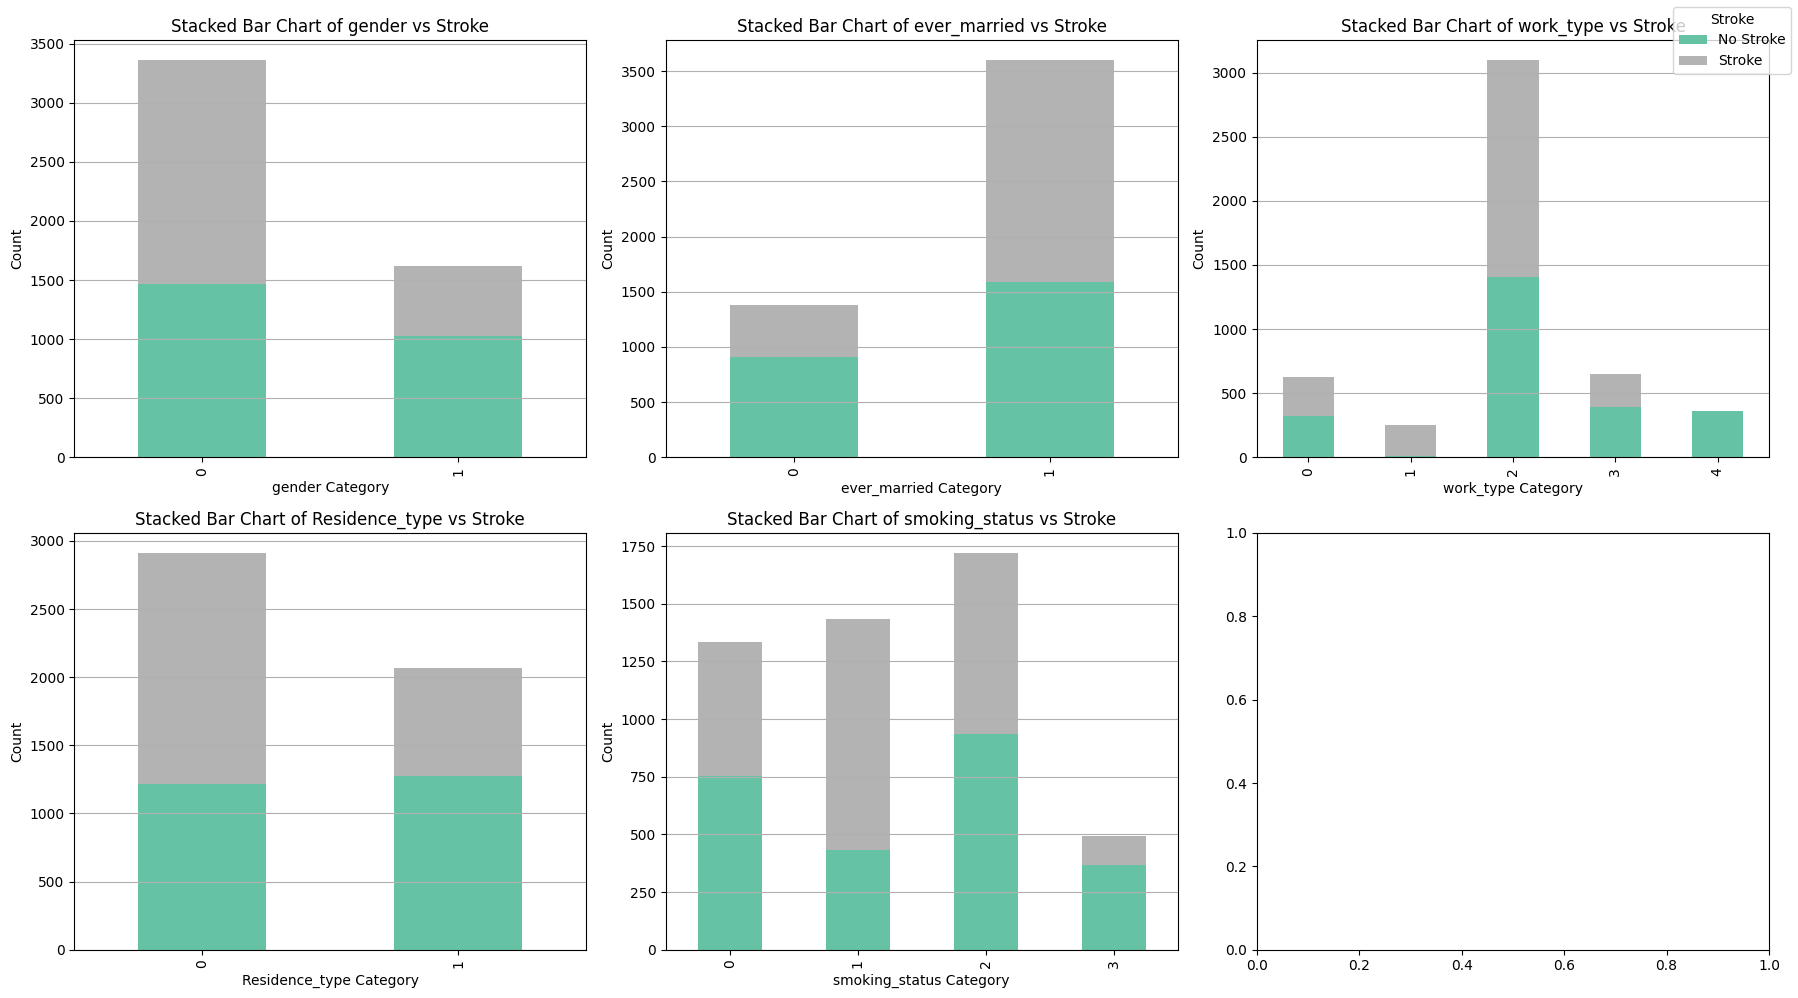

In [14]:
# Stacked bar charts for categorical features vs stroke (grouped)
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

for ax, col in zip(axes.flatten(), categorical_cols[:-1]):  # exclude 'stroke'
    ct = pd.crosstab(df_plot[col], df_plot['stroke'])
    ct.plot(kind='bar', stacked=True, ax=ax, colormap='Set2', legend=False)
    ax.set_title(f'Stacked Bar Chart of {col} vs Stroke')
    ax.set_xlabel(f'{col} Category')
    ax.set_ylabel('Count')
    ax.grid(True, axis='y')

# Add single legend outside
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, ['No Stroke', 'Stroke'], title='Stroke', loc='upper right')

plt.tight_layout()
plt.show()


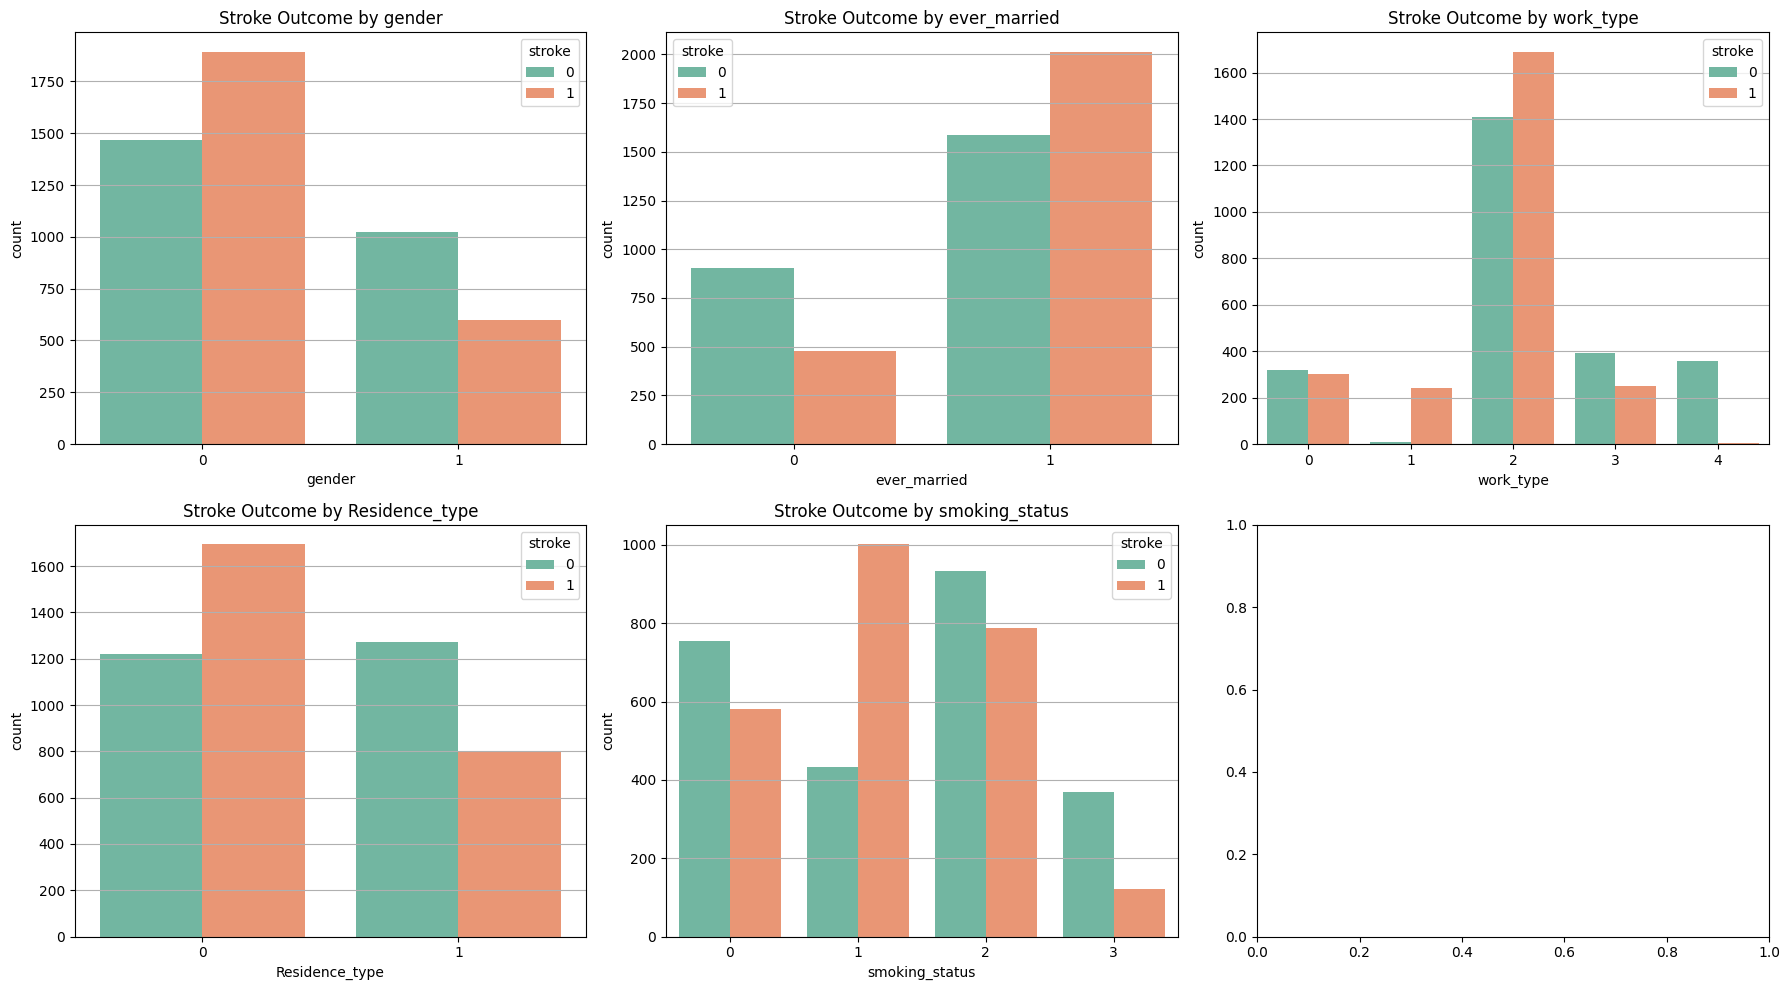

In [15]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
for ax, col in zip(axes.flatten(), categorical_cols[:-1]):  # skip 'stroke'
    sns.countplot(x=df_plot[col], hue=df_plot['stroke'], ax=ax, palette='Set2')
    ax.set_title(f'Stroke Outcome by {col}')
    ax.grid(True, axis='y')
plt.tight_layout()
plt.show()


## multivariate

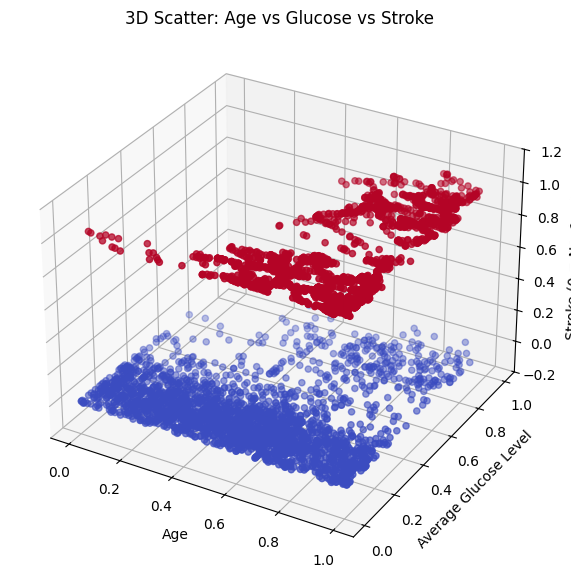

In [16]:
from mpl_toolkits.mplot3d import Axes3D

# 3D scatter plot for Age, Glucose Level, and Stroke with padding
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot
scatter = ax.scatter(df['age'], df['avg_glucose_level'], df_plot['stroke'], 
                     c=df_plot['stroke'], cmap='coolwarm')

# Labels
ax.set_xlabel('Age')
ax.set_ylabel('Average Glucose Level')
ax.set_zlabel('Stroke (0 = No, 1 = Yes)')

# Set padding for visibility
ax.set_zlim(-0.2, 1.2)

# Title
ax.set_title('3D Scatter: Age vs Glucose vs Stroke')

plt.show()


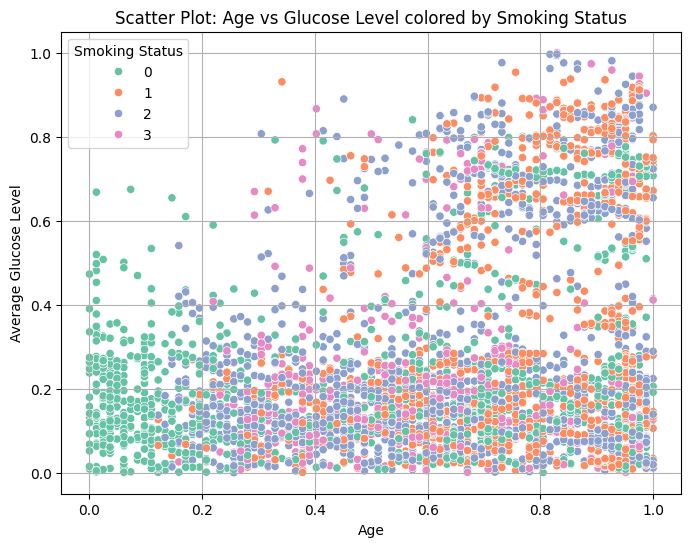

In [17]:
# Scatter plot of Age vs Glucose Level colored by Smoking Status
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['age'], y=df['avg_glucose_level'], hue=df_plot['smoking_status'], palette='Set2')
plt.title('Scatter Plot: Age vs Glucose Level colored by Smoking Status')
plt.xlabel('Age')
plt.ylabel('Average Glucose Level')
plt.grid(True)
plt.legend(title='Smoking Status')
plt.show()


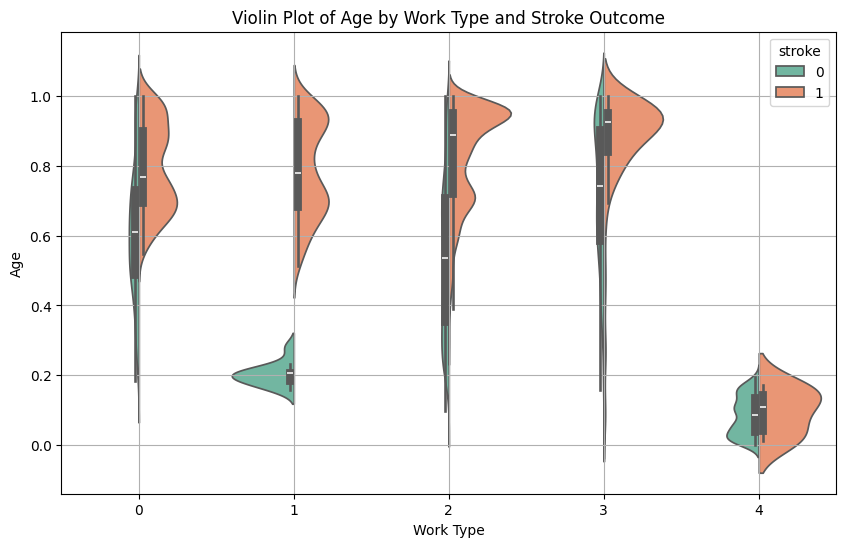

In [18]:
# Violin plot for Age distribution across Work Type and Stroke
plt.figure(figsize=(10,6))
sns.violinplot(x='work_type', y='age', hue='stroke', data=df_plot, split=True, palette='Set2')
plt.title('Violin Plot of Age by Work Type and Stroke Outcome')
plt.xlabel('Work Type')
plt.ylabel('Age')
plt.grid(True)
plt.show()


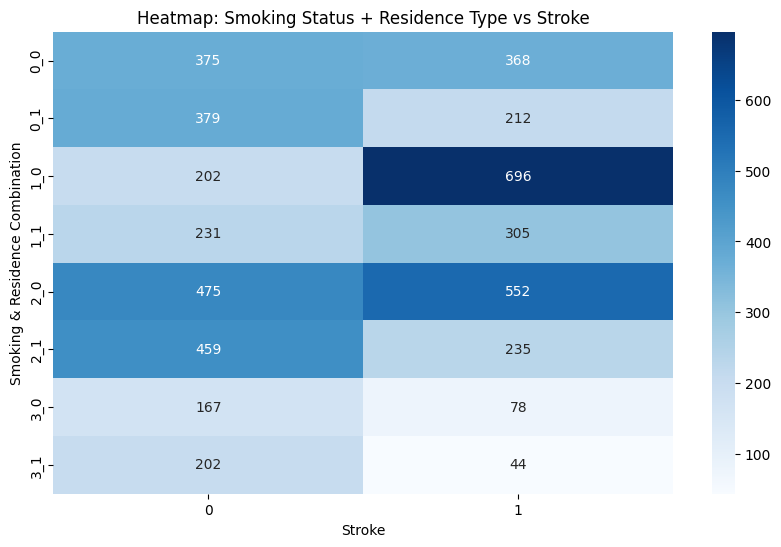

In [19]:
# Create a combined column for Smoking + Residence
df_plot['smoke_residence'] = df_plot['smoking_status'].astype(str) + '_' + df_plot['Residence_type'].astype(str)

# Heatmap of smoking status + residence vs stroke
ct = pd.crosstab(df_plot['smoke_residence'], df_plot['stroke'])

plt.figure(figsize=(10,6))
sns.heatmap(ct, annot=True, cmap='Blues', fmt='d')
plt.title('Heatmap: Smoking Status + Residence Type vs Stroke')
plt.xlabel('Stroke')
plt.ylabel('Smoking & Residence Combination')
plt.show()


# Final: Model Training & Evaluation


✅ Accuracy: 0.8906

❌ Log Loss: 0.2754

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.87      0.89       498
           1       0.87      0.91      0.89       498

    accuracy                           0.89       996
   macro avg       0.89      0.89      0.89       996
weighted avg       0.89      0.89      0.89       996



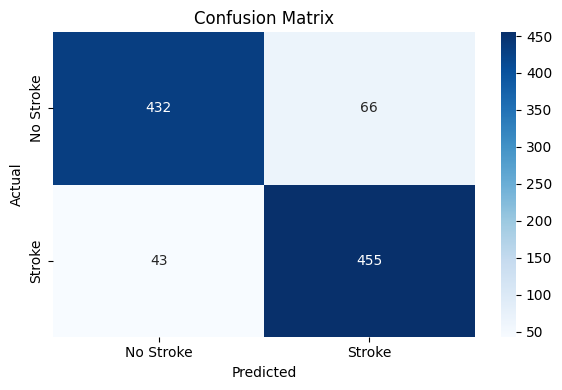

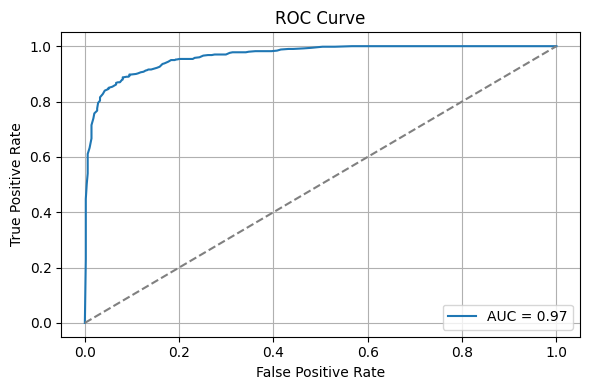

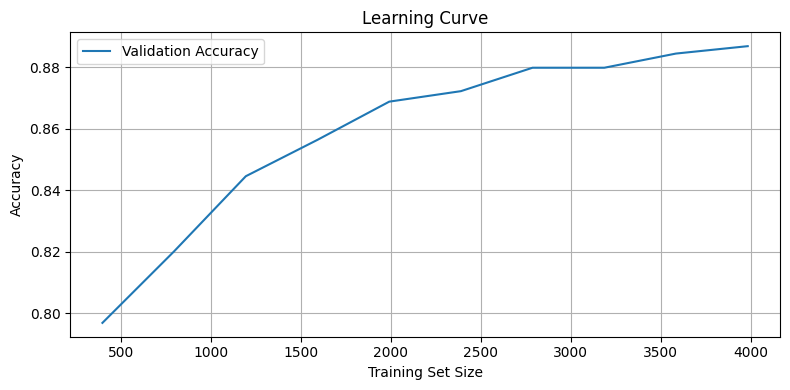


💾 Model saved as rf_model.pkl


In [20]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
)

# Load preprocessed dataset
df = pd.read_csv('final_stroke_dataset.csv')
X = df.drop('stroke', axis=1)
y = df['stroke']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Train model
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

# Evaluation metrics
acc = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)
cm = confusion_matrix(y_test, y_pred)

print(f"\n✅ Accuracy: {acc:.4f}")
from sklearn.metrics import log_loss

loss = log_loss(y_test, clf.predict_proba(X_test))
print(f"\n❌ Log Loss: {loss:.4f}")


print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))

# Plot: Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Stroke', 'Stroke'],
            yticklabels=['No Stroke', 'Stroke'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


from sklearn.model_selection import learning_curve
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(
    clf, X, y, cv=5, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10),
    random_state=42
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(8, 4))
plt.plot(train_sizes, test_mean, label='Validation Accuracy')
plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Save model
joblib.dump(clf, 'rf_model.pkl')
print("\n💾 Model saved as rf_model.pkl")


In [21]:
import pandas as pd
import joblib
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

# Load raw dataset
raw = pd.read_csv('healthcare-dataset-stroke-data.csv')

# Define columns
cat_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
num_cols = ['age', 'avg_glucose_level']

# === STEP 1: Use one LabelEncoder per categorical column ===
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    raw[col] = le.fit_transform(raw[col])
    label_encoders[col] = le

# === STEP 2: StandardScaler per categorical column ===
cat_scalers = {}
for col in cat_cols:
    scaler = StandardScaler()
    raw[col] = scaler.fit_transform(raw[[col]])
    cat_scalers[col] = scaler

# === STEP 3: MinMaxScaler for numeric columns ===
scaler_age = MinMaxScaler()
scaler_glucose = MinMaxScaler()

raw['age'] = scaler_age.fit_transform(raw[['age']])
raw['avg_glucose_level'] = scaler_glucose.fit_transform(raw[['avg_glucose_level']])

# === STEP 4: Save all transformers ===
joblib.dump(label_encoders, 'label_encoders.pkl')        # dict of LabelEncoder per col
joblib.dump(cat_scalers, 'cat_scalers.pkl')              # dict of StandardScaler per col
joblib.dump(scaler_age, 'scaler_age.pkl')                # MinMaxScaler for age
joblib.dump(scaler_glucose, 'scaler_glucose.pkl')        # MinMaxScaler for glucose

print("✅ Saved: label_encoders.pkl, cat_scalers.pkl, scaler_age.pkl, scaler_glucose.pkl")


✅ Saved: label_encoders.pkl, cat_scalers.pkl, scaler_age.pkl, scaler_glucose.pkl
